Librerias

In [1]:
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import sklearn as sk
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import LocalOutlierFactor

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Lectura Dataset

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('properati_argentina_2021.csv')
df = complete_dataset.copy()

### Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

**Filas y Columnas**

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


**Metrica del dataset**

In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

**Tipos de datos**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

### Filtrado inicial del Dataset

In [9]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]].head()

place_l2 place_l3 property_currency property_type operation
25  Capital Federal      NaN               USD          Casa     Venta
42  Capital Federal     Boca               USD  Departamento     Venta
43  Capital Federal     Boca               USD  Departamento     Venta
49  Capital Federal     Once               USD  Departamento     Venta
51  Capital Federal    Boedo               USD            PH     Venta

#### Tipos de variable

In [10]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

**Separacion en Train y Test**

Separamos el dataset.

Datos de entrenamiento = 80%

Datos de Testing = 20%

Con el 80% entrenaremos a los modelos y con el 20% testearemos que los modelos estén funcionando como se espera.

Realizamos la separación antes de comenzar a trabajar con los datos para que durante la etapa de entrenamiento no se conozcan los mismo ya que luego se usarán para testear y así se podrá predecir de forma adecuada.

In [11]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

In [12]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71362
mean     74 days 14:44:18.961351980
std      84 days 07:20:19.953358618
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

In [13]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

16673     2022-03-31
44019     2022-01-27
132166    2021-02-20
322814    2021-07-05
172798    2021-08-09
             ...    
432671    2021-06-05
315507    2022-03-11
45222     2021-08-24
392895    2021-11-03
76763     2022-04-22
Name: end_date, Length: 75399, dtype: object

In [14]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

#### Variables Cuantitativas: medidas de resumen

In [15]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74586.000000       66626.000000            71497.000000   
mean              2.823600           2.016045              110.979104   
std               1.437114           1.142183             1064.412624   
min               1.000000           1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              105.000000   
max              40.000000          70.000000           137000.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72740.000000  72430.000000  72430.000000   
mean                       90.244254    -34.591482    -58.449837   
std                      1107.006541      0.187835      0.294272   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.615924    -58.466524   
median                     58.000000    -34.595839    -58.438968   
quartile 3                 89.000000    -34.577383    -58.408917   
max                    217000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.266301e+05  
std           3.205986e+05  
min           6.500000e+03  
quartile 1    9.500000e+04  
median        1.439000e+05  
quartile 3    2.380000e+05  
max           2.140000e+07  
mode          1.100000e+05

#### Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.


In [16]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

#### Análisis gráfico de las distribuciones de las variables

**Distribución de fechas**

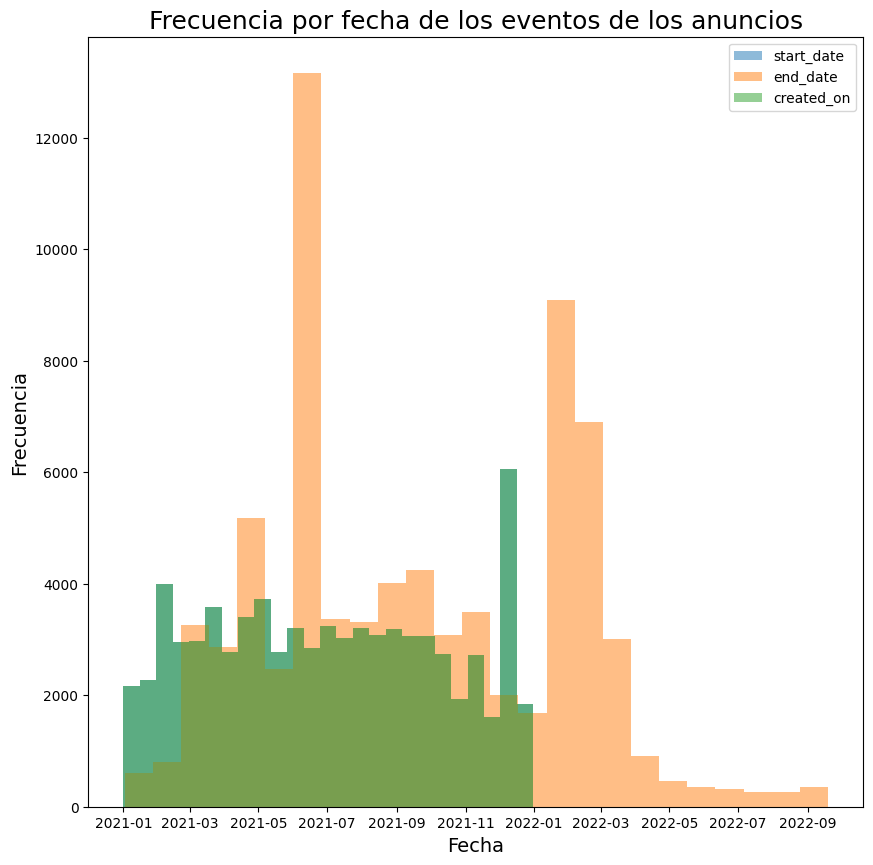

In [17]:
plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')

**Distribución de barrios**

In [18]:
top25 = ds_train['place_l3'].value_counts().head(25)

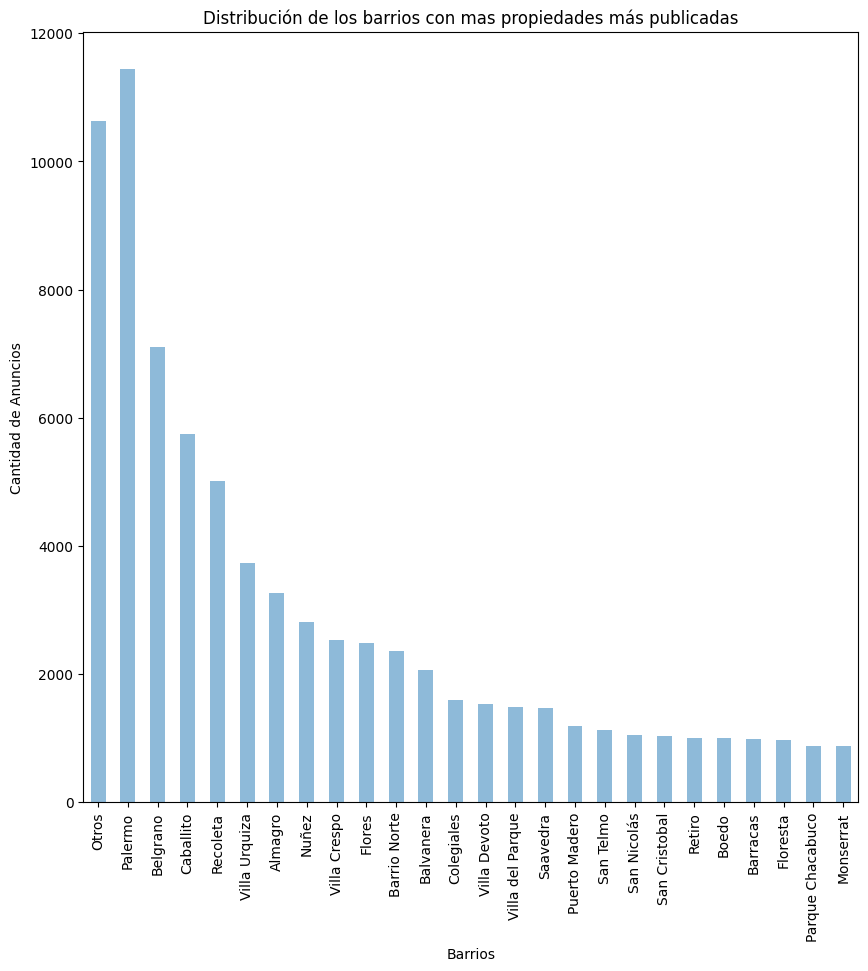

In [19]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

**Distribución de tipos de propiedad**

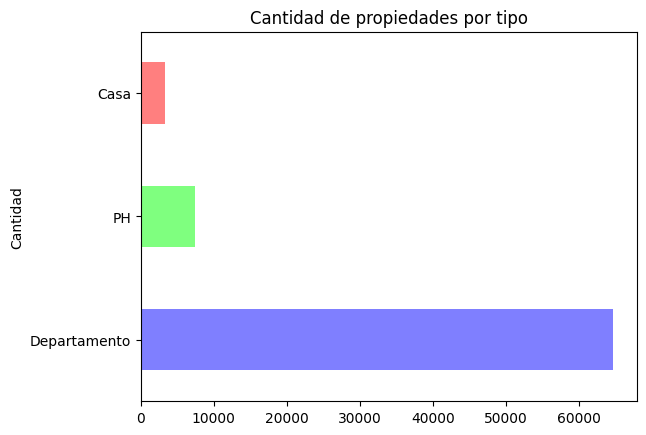

In [20]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

**Distribución de latitud y longitud**

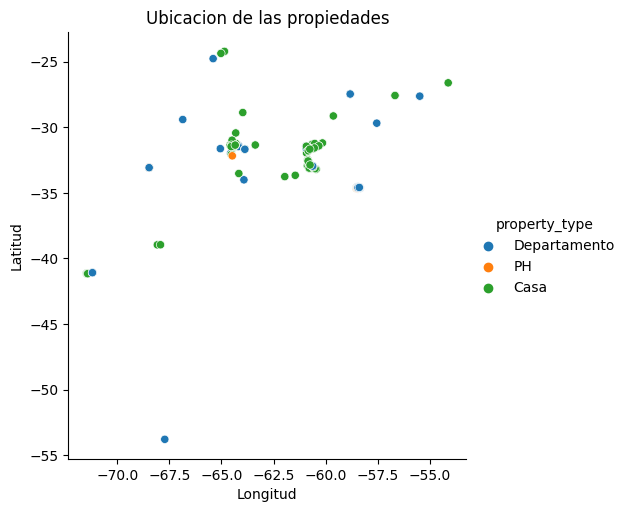

In [21]:

sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

**Distribución de habitaciones y baños**

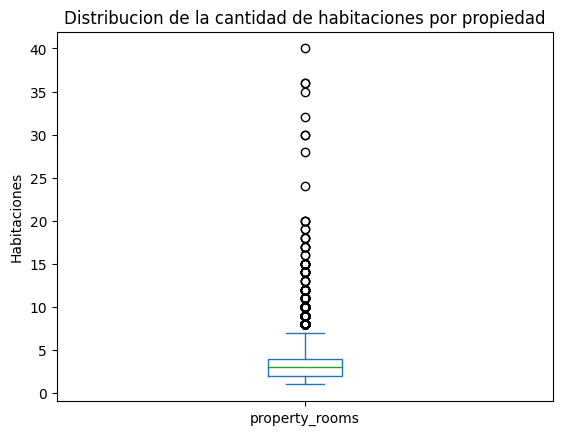

In [22]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

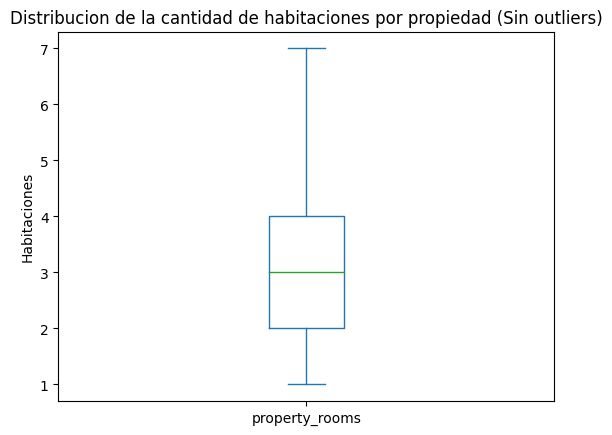

In [23]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

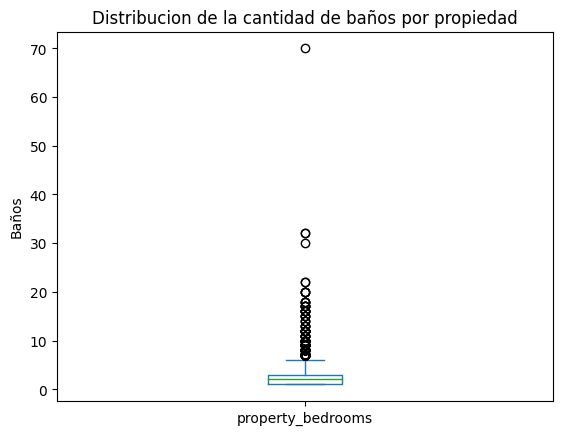

In [24]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")


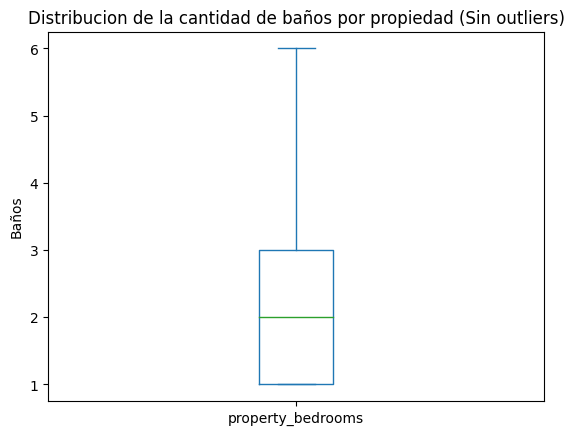

In [25]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

**Distribución de precio**

In [26]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143900.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

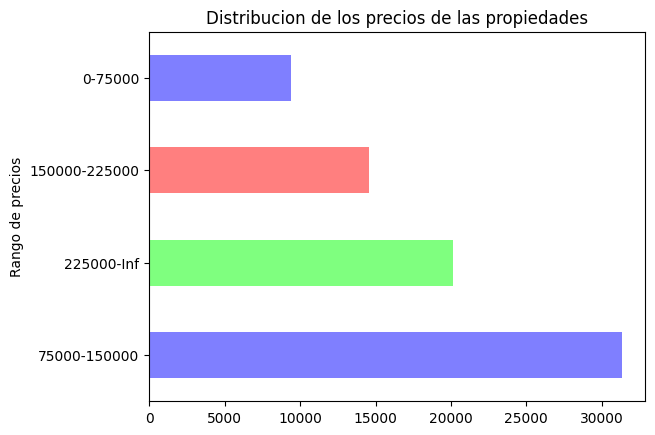

In [27]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

**Distribución de superficie total y cubierta**

<AxesSubplot: >

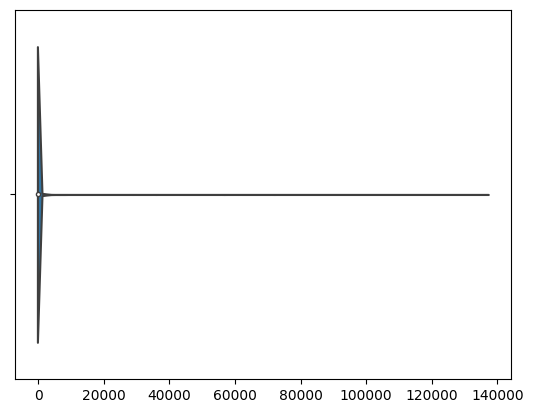

In [28]:
sns.violinplot(ds_train.property_surface_total.values)

<AxesSubplot: >

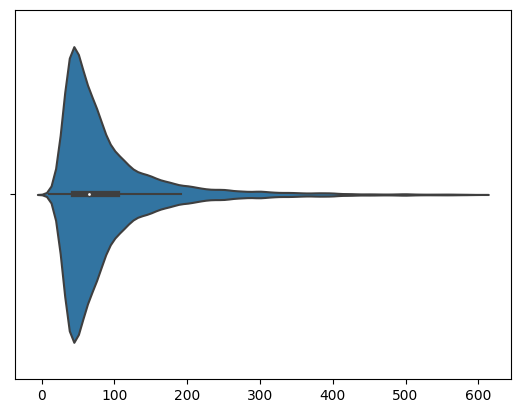

In [29]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

<AxesSubplot: >

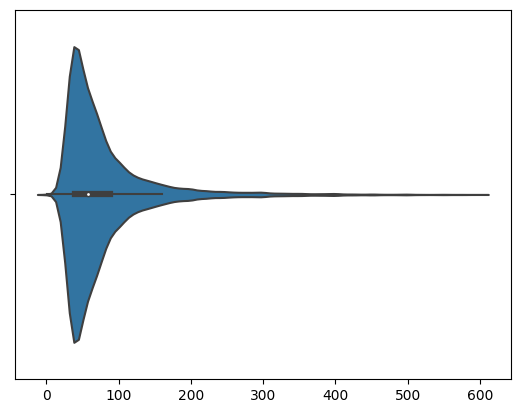

In [30]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

#### Correlación entre variables

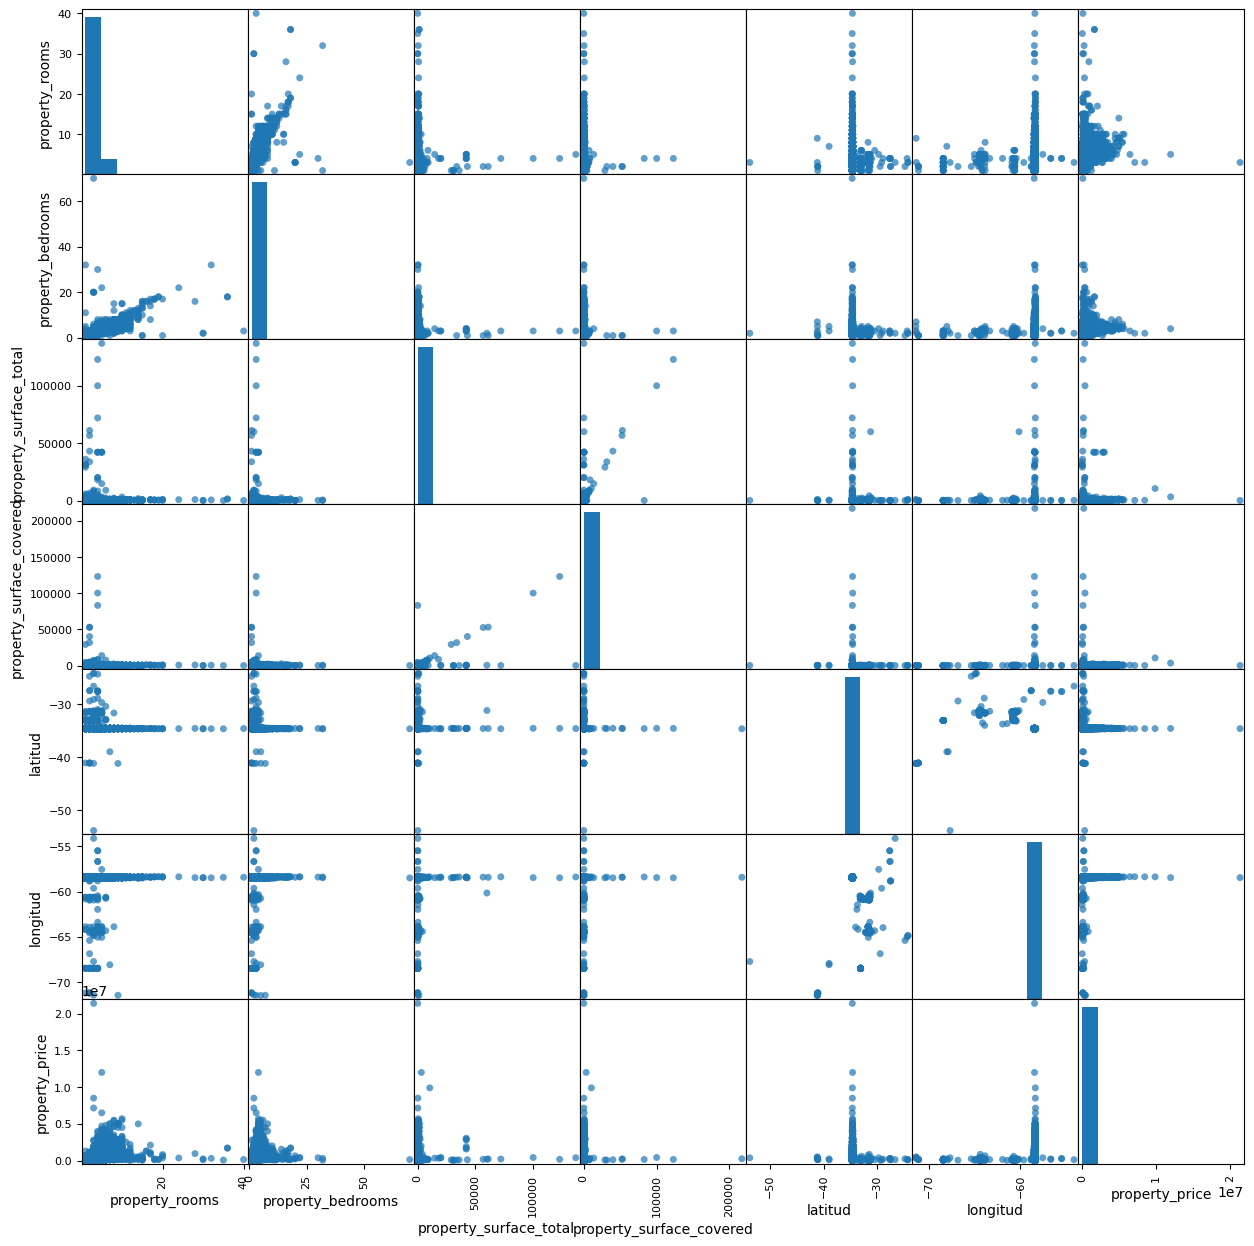

In [31]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

In [32]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.865268   
property_bedrooms               0.865268           1.000000   
property_surface_total          0.064091           0.062262   
property_surface_covered        0.068541           0.066867   
latitud                         0.003120          -0.000207   
longitud                       -0.007362          -0.008369   
property_price                  0.484004           0.423060   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.064091                  0.068541   
property_bedrooms                       0.062262                  0.066867   
property_surface_total                  1.000000                  0.620990   
property_surface_covered                0.620990                  1.000000   
latitud                                 0.024671                  0.001528   
longitud                               -0.013451                 -0.000698   
property_price                          0.079935                  0.050943   

                           latitud  longitud  property_price  
property_rooms            0.003120 -0.007362        0.484004  
property_bedrooms        -0.000207 -0.008369        0.423060  
property_surface_total    0.024671 -0.013451        0.079935  
property_surface_covered  0.001528 -0.000698        0.050943  
latitud                   1.000000 -0.203263        0.012470  
longitud                 -0.203263  1.000000        0.024274  
property_price            0.012470  0.024274        1.000000

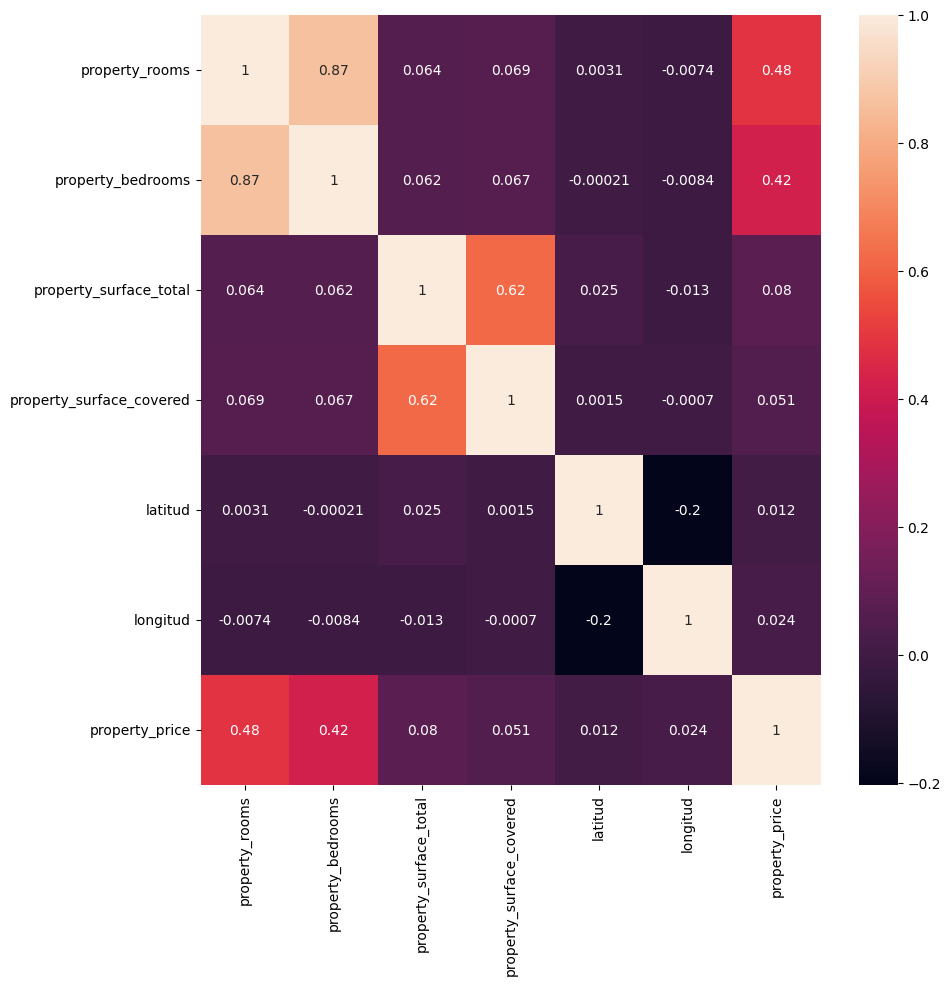

In [33]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

In [34]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.87
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.48
Entre property_surface_total y property_surface_covered:0.62
Entre longitud y latitud:-0.2


### Análisis de valores faltantes

#### Porcentaje de valores faltantes por columna

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.937718
longitud                      3.937718
place_l2                      0.000000
place_l3                      0.460218
place_l4                     96.115333
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.078264
property_bedrooms            11.635433
property_surface_total        5.175135
property_surface_covered      3.526572
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


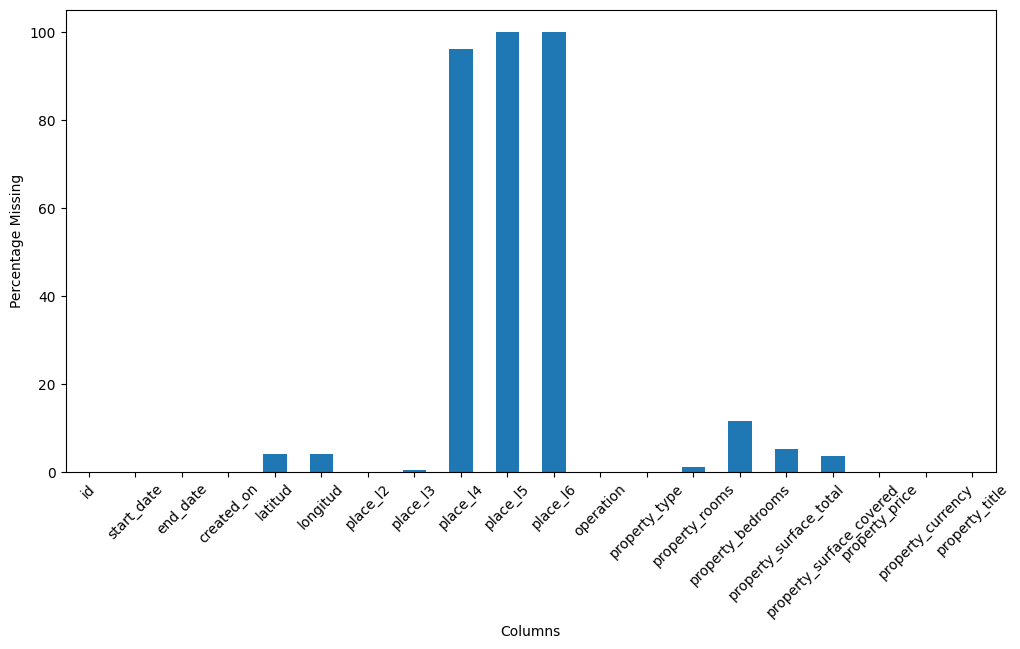

In [35]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

#### Porcentaje de datos faltantes por fila

<AxesSubplot: >

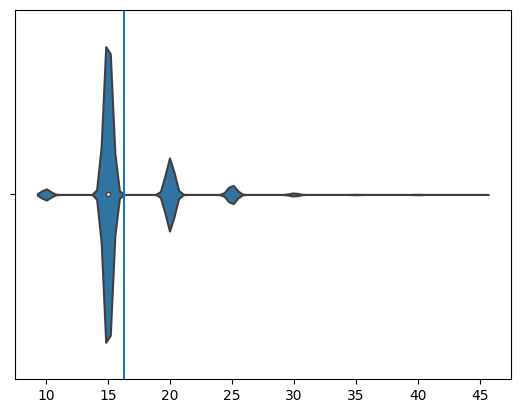

In [36]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

In [37]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.937718
longitud                      3.937718
place_l2                      0.000000
place_l3                      0.460218
place_l4                     96.115333
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.078264
property_bedrooms            11.635433
property_surface_total        5.175135
property_surface_covered      3.526572
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


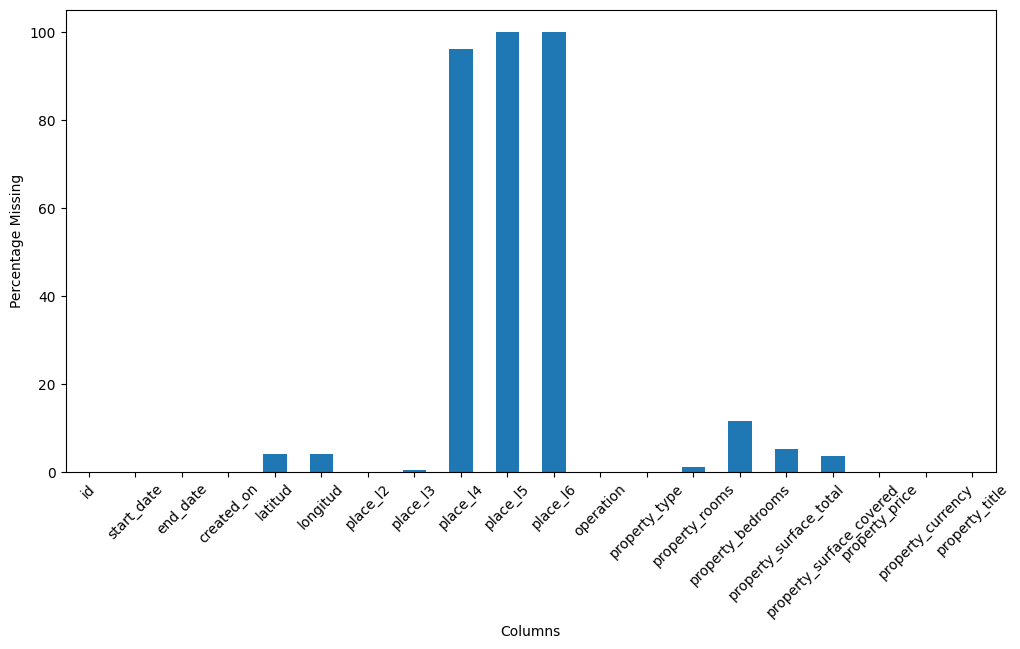

In [38]:
plot_missing_by_column(ds_train)

In [39]:
## Train

ds_train = ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

## Test
ds_test = ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

### Reparacion de datos faltantes

**Pre Imputacion de latitud y longitud**

latitud    3.937718
dtype: float64


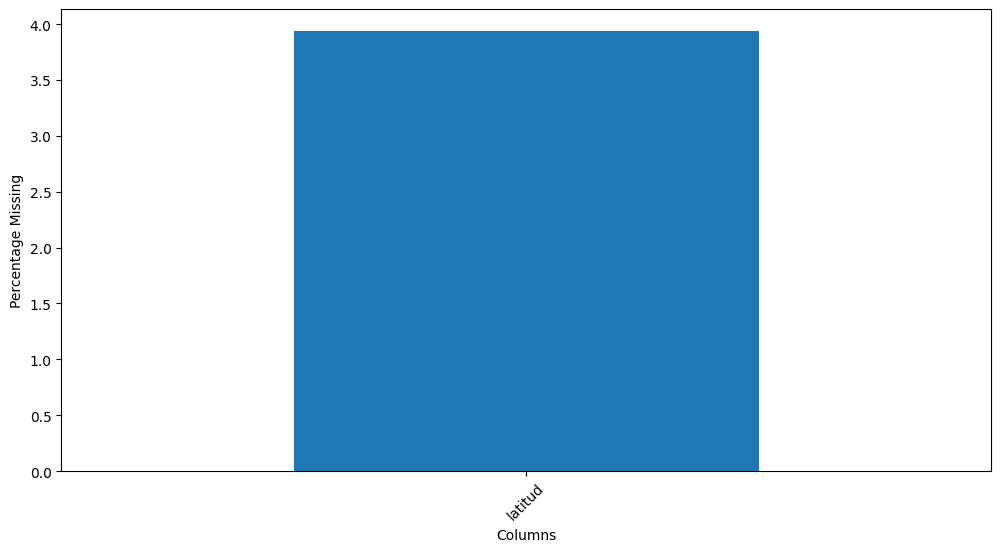

In [40]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.937718
dtype: float64


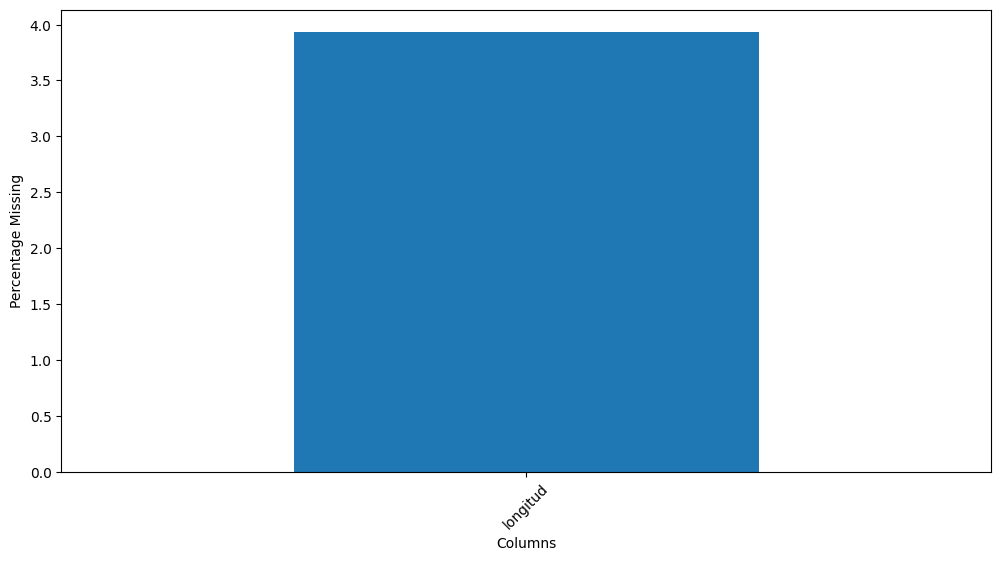

In [41]:
plot_missing_by_column(ds_train[['longitud']])

In [42]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [43]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [44]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.884%
Los datos faltantes en la columna place_l3 para test representan el 3.285%


In [45]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

In [46]:
ds_train[ds_train.latitud.isna()]

id start_date   end_date  latitud  longitud  \
363969  p6PDh9UYBzTc/nWB1Ye2Xw== 2021-04-10 2021-04-13      NaN       NaN   
299216  3YXrUTUsKAzutpSbOuezfg== 2021-01-18 2021-01-29      NaN       NaN   
377126  utOWuv4OXDSljDlUPiZh3A== 2021-03-16 2021-06-05      NaN       NaN   
3099    cLeo0+I+Zt0/4dwt9KeFlg== 2021-02-20 2021-03-01      NaN       NaN   
151716  +qSJjZYy7p+mobIddB6WNA== 2021-08-05 2021-11-04      NaN       NaN   
...                          ...        ...        ...      ...       ...   
309867  2oiyp4YLGap4pyz/JrKC3A== 2021-09-01 2021-11-04      NaN       NaN   
210124  ls4Scl/nlsrBQFjQQ7GXIQ== 2021-07-22 2021-10-26      NaN       NaN   
151047  7Vj5JIBtVFUQQPDASV8LMQ== 2021-08-05 2021-08-08      NaN       NaN   
318766  2R+1KBzugiC44t5m4HH8Zg== 2021-03-17 2021-05-19      NaN       NaN   
101428  gF45Up7vyzAOFVs11JkikQ== 2021-05-28 2021-06-05      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
363969      NaN          Casa             NaN                1.0   
299216      NaN            PH             3.0                2.0   
377126      NaN  Departamento             4.0                2.0   
3099        NaN          Casa             3.0                2.0   
151716      NaN  Departamento             2.0                NaN   
...         ...           ...             ...                ...   
309867      NaN  Departamento             2.0                NaN   
210124      NaN  Departamento             3.0                NaN   
151047      NaN          Casa             5.0                4.0   
318766      NaN  Departamento             1.0                NaN   
101428      NaN          Casa             NaN                2.0   

        property_surface_total  property_surface_covered  property_price  \
363969                   300.0                     300.0        330000.0   
299216                   138.0                      78.0        138000.0   
377126                     NaN                      98.0        300000.0   
3099                      69.0                      53.0         54600.0   
151716                     NaN                      48.0         89000.0   
...                        ...                       ...             ...   
309867                     NaN                      40.0         84900.0   
210124                     NaN                      60.0        150000.0   
151047                   292.0                     203.0        360000.0   
318766                     NaN                      44.0         80000.0   
101428                    80.0                      80.0        116780.0   

                                           property_title  
363969  Venta de local con casa zona de Exlatacion de ...  
299216                              PH - Villa Gral.Mitre  
377126                     Departamento - Capital Federal  
3099    Venta Duplex 3 amb. Complejo Quimaral I - San ...  
151716  Departamento en Venta Caba / Buenos Aires (B11...  
...                                                   ...  
309867  Departamento en Venta Caba / Buenos Aires (B11...  
210124  Departamento en Venta Caba / Buenos Aires (D03...  
151047  Casa-proyecto a la venta en Barrio Golf I lote...  
318766  Departamento en Venta CABA / Buenos Aires (D03...  
101428                    VENTA DEPARTAMENTO 2 DORMITORIO  

[145 rows x 13 columns]

In [47]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
364009  gs6jPTGaPxlQyw3+cArfIA==        NaT      NaT      NaN       NaN   
31871   BKX/oZw0f3iowrtswwdbMA==        NaT      NaT      NaN       NaN   
335758  WHW43q4WY6/9r8onU+XHlA==        NaT      NaT      NaN       NaN   
223287  ANBlWDLQarFIoRKCdED4SQ==        NaT      NaT      NaN       NaN   
251806  tC1oqOOm/XEraWtI3riChA==        NaT      NaT      NaN       NaN   
84681   FDP0I8rP+WzTtwUj4Gc2iQ==        NaT      NaT      NaN       NaN   
380292  7KJvQW5IT18i55fQwRu7dg==        NaT      NaT      NaN       NaN   
384799  RbFNzVNNCitS39u7eBRZJg==        NaT      NaT      NaN       NaN   
218048  vRA/0y8xkAUweY9h1T7EzA==        NaT      NaT      NaN       NaN   
314302  bwuR+TtMs/dnDTw5YmvC6A==        NaT      NaT      NaN       NaN   
83547   HMcd5R2BH3ZwFht+Xr31fA==        NaT      NaT      NaN       NaN   
159524  PHefnaqylyBP8DwDutBIIQ==        NaT      NaT      NaN       NaN   
97180   tFdkkcTHiZcNpifiq0EJuQ==        NaT      NaT      NaN       NaN   
161811  OBEJUlZ0HWzDeQOdVfUQ5g==        NaT      NaT      NaN       NaN   
44423   oGPgLc4InEc+5rOhp+H7PA==        NaT      NaT      NaN       NaN   
343265  ivCufxbxoTGNCsW8IF72Iw==        NaT      NaT      NaN       NaN   
106696  iV7+4ns6JXgPJSEj0D9ezg==        NaT      NaT      NaN       NaN   
47980   SN9IPUb1lO6rVU9Q6jHRXA==        NaT      NaT      NaN       NaN   
158449  /j3wYMmm9WUqKnvnVvlZlQ==        NaT      NaT      NaN       NaN   
348183  pM5dQ2VTfrThYBFjlnY15g==        NaT      NaT      NaN       NaN   
143125  pg20DD3zV1p2ACa+Pvangg==        NaT      NaT      NaN       NaN   
163810  hhXFb7aU9UN5WLlJvrwnDA==        NaT      NaT      NaN       NaN   
309009  lueG6ZNaiqX2qrMCJHFeyg==        NaT      NaT      NaN       NaN   
459195  E8hNlBjeRdD9Cr759qVghQ==        NaT      NaT      NaN       NaN   
93803   MbzcuMKtbLgu0MSLdMv8gw==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
364009      NaN          Casa             NaN                5.0   
31871       NaN  Departamento             NaN                2.0   
335758      NaN  Departamento             2.0                1.0   
223287      NaN  Departamento             3.0                NaN   
251806      NaN          Casa             5.0                4.0   
84681       NaN  Departamento             3.0                2.0   
380292      NaN            PH             3.0                NaN   
384799      NaN            PH             3.0                NaN   
218048      NaN          Casa             NaN                2.0   
314302      NaN  Departamento             2.0                NaN   
83547       NaN  Departamento             NaN                3.0   
159524      NaN  Departamento             3.0                2.0   
97180       NaN          Casa             NaN                4.0   
161811      NaN  Departamento             2.0                1.0   
44423       NaN            PH             2.0                NaN   
343265      NaN  Departamento             7.0                2.0   
106696      NaN  Departamento             3.0                2.0   
47980       NaN  Departamento             2.0                1.0   
158449      NaN          Casa            10.0                7.0   
348183      NaN  Departamento             4.0                3.0   
143125      NaN  Departamento             2.0                NaN   
163810      NaN  Departamento             2.0                1.0   
309009      NaN          Casa             NaN                6.0   
459195      NaN  Departamento             2.0                1.0   
93803       NaN  Departamento             1.0                NaN   

        property_surface_total  property_surface_covered  property_price  \
364009                   260.0                     260.0        385000.0   
31871                     90.0                       NaN        250000.0   
335758                    50.0                      50.0         62000.0   
223287

In [48]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0019%
El porcentaje de valores a eliminar en test corresponden a un 0.0013%


In [49]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

**Post Imputacion de latitud y longitud**

latitud    0.0
dtype: float64


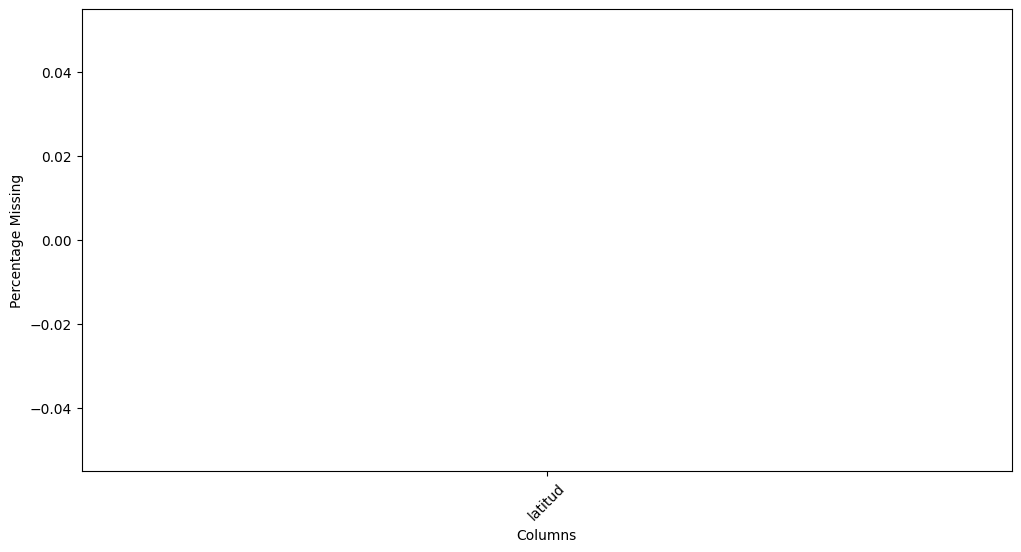

In [50]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


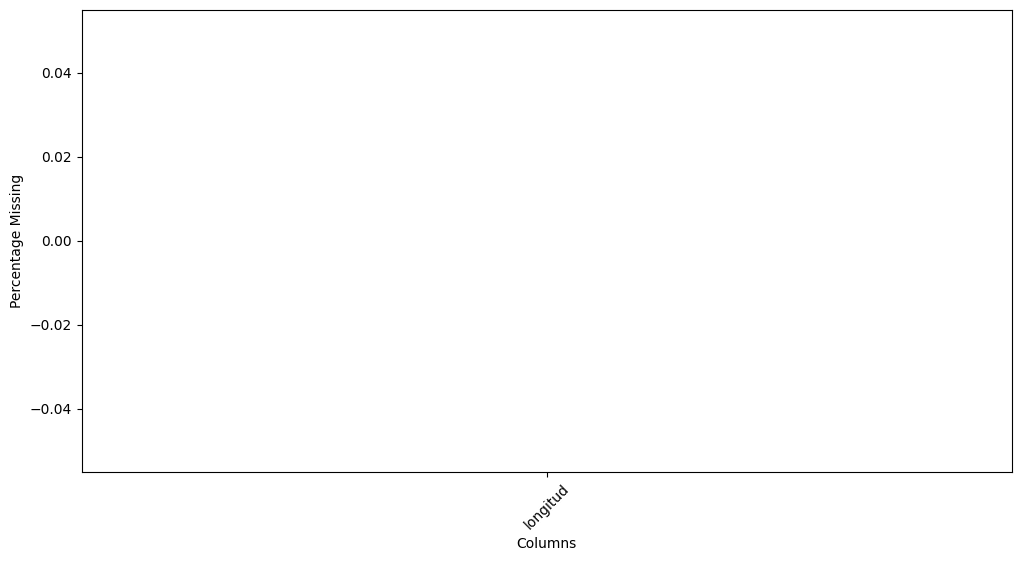

In [51]:
plot_missing_by_column(ds_train[['longitud']])

**Pre imputación de ambientes**

property_rooms    1.048449
dtype: float64


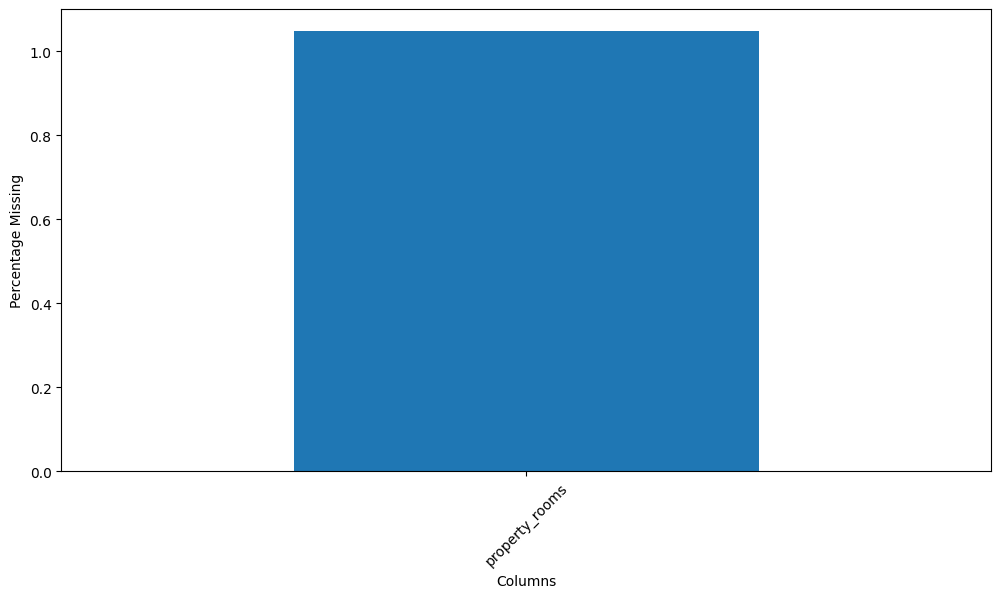

In [52]:
plot_missing_by_column(ds_train[['property_rooms']])

**Reparacion de ambientes faltantes en base al titulo de la propiedad**

In [53]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")

In [54]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 789
cantidad de ambientes faltantes post reparacion: 619
cantidad inicial de ambientes a reparar: 225
cantidad de ambientes faltantes post reparacion: 221


**Post Imputacion de ambientes**

property_rooms    0.822548
dtype: float64


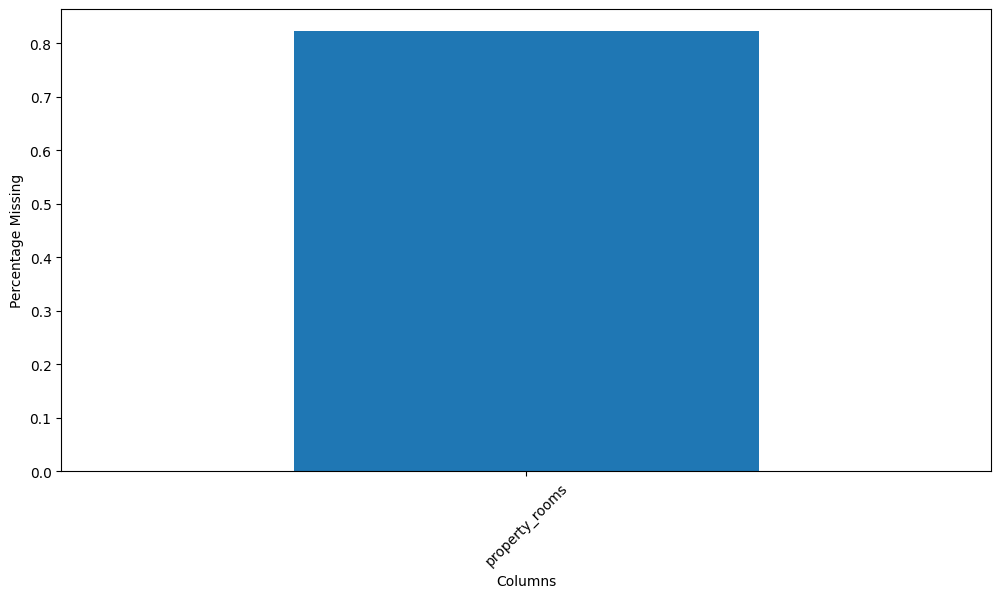

In [55]:
plot_missing_by_column(ds_train[['property_rooms']])

In [56]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


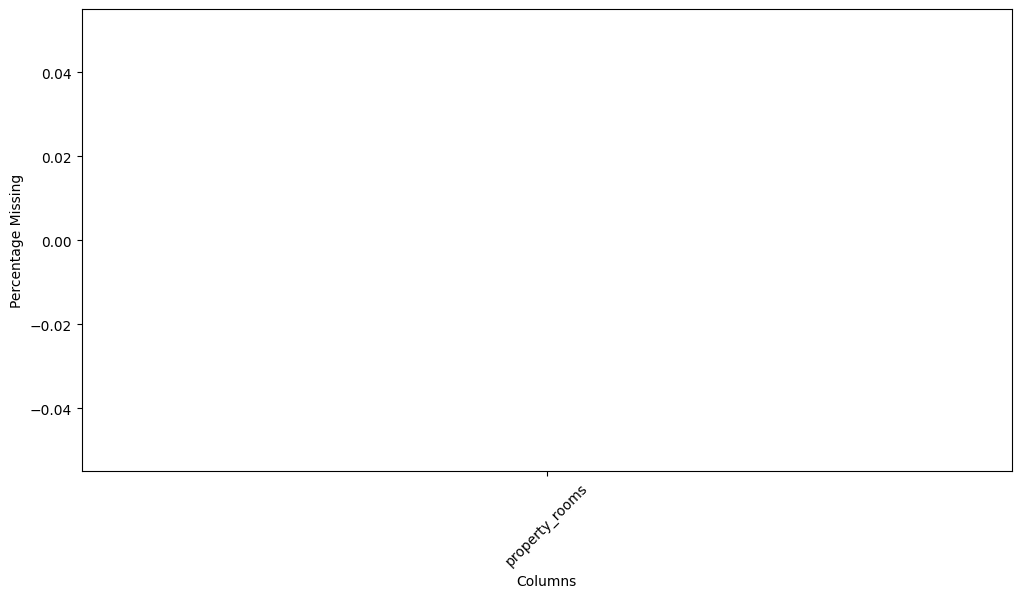

In [57]:
plot_missing_by_column(ds_train[['property_rooms']])

**Pre Imputacion de Habitaciones**

property_bedrooms    11.28693
dtype: float64


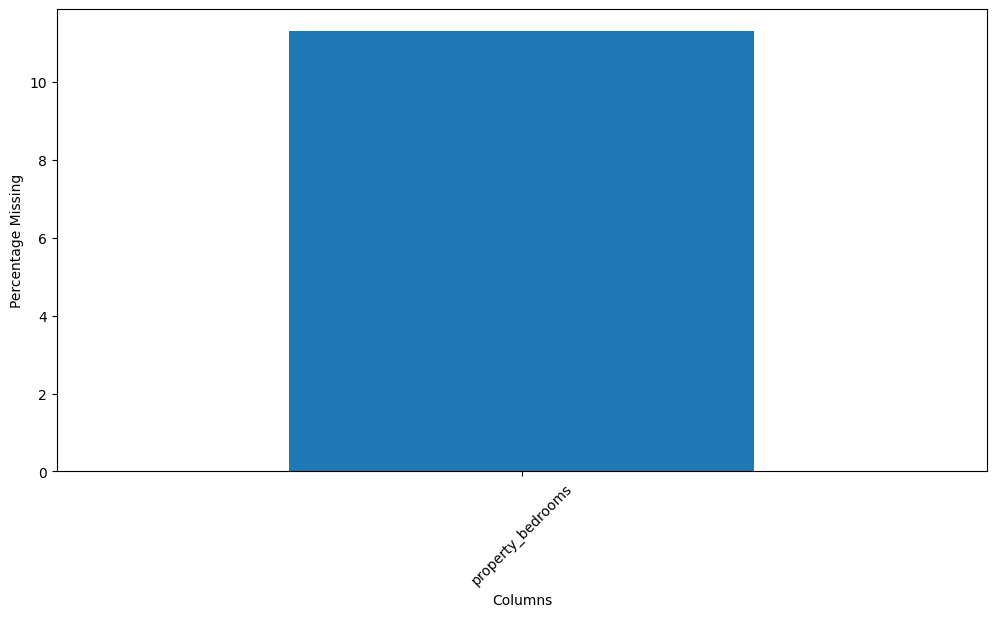

In [58]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Reparacion de habitaciones faltantes en base a los ambientes**

In [59]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

El total de habitaciones en train es: 74635
El total de habitaciones invalidas es: 141. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18604
El total de habitaciones invalidas es: 22. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
48332   /VjUSHWTdfV9lkqkj+SFvA==        NaT      NaT -34.613200 -58.471100   
308820  PfSrBA7qDBzgseJ4JyQF/w==        NaT      NaT -34.637611 -58.402928   
115491  u5hOV+bJihRU3VAVxsfsrw==        NaT      NaT -34.613037 -58.360984   
428097  5Q58aJJXojGC5f6ryqbJjw==        NaT      NaT -34.595668 -58.389490   
432156  bNrkEmRn2xrrFxVfXkhZ3A==        NaT      NaT -34.650316 -58.481964   
34437   3mkvrKJwUQJcyATeXceZVQ==        NaT      NaT -34.595668 -58.389490   
27849   indoHQClfn3r0gDuKdqgLQ==        NaT      NaT -34.592121 -58.401069   
100370  zUsUsmAutDkdz1cIuJ9ANg==        NaT      NaT -34.608162 -58.453786   
130394  oGubrAcyAHXx5ilYS91Euw==        NaT      NaT -34.643439 -58.429532   
14163   TSH/MP+ATH7g5J0BzcENvg==        NaT      NaT -34.562460 -58.454052   
393372  7nxreTyKxab7bspnoAodSQ==        NaT      NaT -34.612133 -58.406925   
41088   ngtAPqtsUhn8Y9+r/FgteA==        NaT      NaT -34.614573 -58.480650   
229212  azlGDc44w5UKu1Ft0aWdLA==        NaT      NaT -34.623053 -58.447006   
113814  BrWCt7KwuYGEW5/x5LsTkg==        NaT      NaT -34.577669 -58.428640   
48279   r3sXlEIiCgBG5TtUkN93mw==        NaT      NaT -34.608645 -58.485619   
130208  aDyZI32jYV/LuQdSHQRAOQ==        NaT      NaT -34.604930 -58.440416   
115494  KolgNlvVaeHHOfEDHGy8IA==        NaT      NaT -34.612667 -58.362521   
432011  s14IJlvWuE+oZmMurxiGpw==        NaT      NaT -34.643086 -58.435170   
452275  DzALh3DQ7Dp1VmfhkZvL4w==        NaT      NaT -34.596921 -58.402560   
323765  axwZ6U4+1RIdVT+eKpht9w==        NaT      NaT -34.605374 -58.365343   
366821  4GyOVwbzH4+nOXZbkPwZKA==        NaT      NaT -34.621096 -58.431777   
103915  LqBk5itH7jSvk1FBXV0LxQ==        NaT      NaT -34.577180 -58.451264   

                   place_l3 property_type  property_rooms  property_bedrooms  \
48332   Villa General Mitre            PH             3.0                4.0   
308820     Parque Patricios  Departamento             1.0                2.0   
115491        Puerto Madero  Departamento             3.0                4.0   
428097             Recoleta  Departamento             4.0                5.0   
432156    Parque Avellaneda            PH             4.0                5.0   
34437              Recoleta  Departamento             4.0                5.0   
27849              Recoleta  Departamento             2.0               10.0   
100370            Caballito          Casa             5.0                6.0   
130394              Pompeya            PH             3.0                4.0   
14163              Belgrano  Departamento             4.0                5.0   
393372            Balvanera            PH             6.0                7.0   
41088      Villa del Parque  Departamento             2.0               11.0   
229212            Caballito  Departamento             4.0                5.0   
113814             Belgrano  Departamento             1.0                2.0   
48279      Villa del Parque  Departamento             4.0               32.0   
130208         Villa Crespo          Casa             5.0                8.0   
115494        Puerto Madero  Departamento             4.0                6.0   
432011     Parque Chacabuco            PH             3.0                4.0   
452275             Recoleta  Departamento             4.0                5.0   
323765            San Telmo  Departamento             1.0                2.0   
366821            Caballito  Departamento             3.0                4.0   
103915           Colegiales  Departamento             6.0                8.0   

        property_surface_total  property_surface_covered  property_price  \
48332                    800.0                     720.0        495000.0   
308820                    32.0                      28.0         64000.0   
115491                   170.0                     166.0       1050000.0   
428097                   500.0                     500.0       1100000.0   
432156        

In [60]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55717. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13970. Constituyen al 75% de los datos


In [61]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8424
Valor inicial de habitaciones faltantes en el ds de test: 2102


In [62]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [63]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Post Imputacion de habitaciones**

property_bedrooms    0.0
dtype: float64


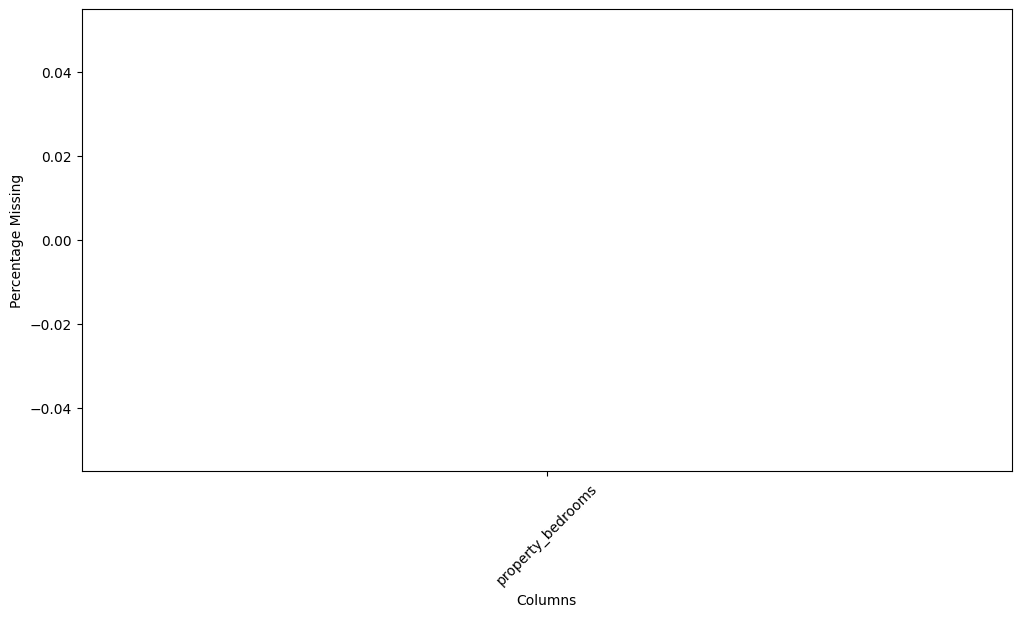

In [64]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Pre Imputación de Superficie total**

property_surface_total    4.944061
dtype: float64


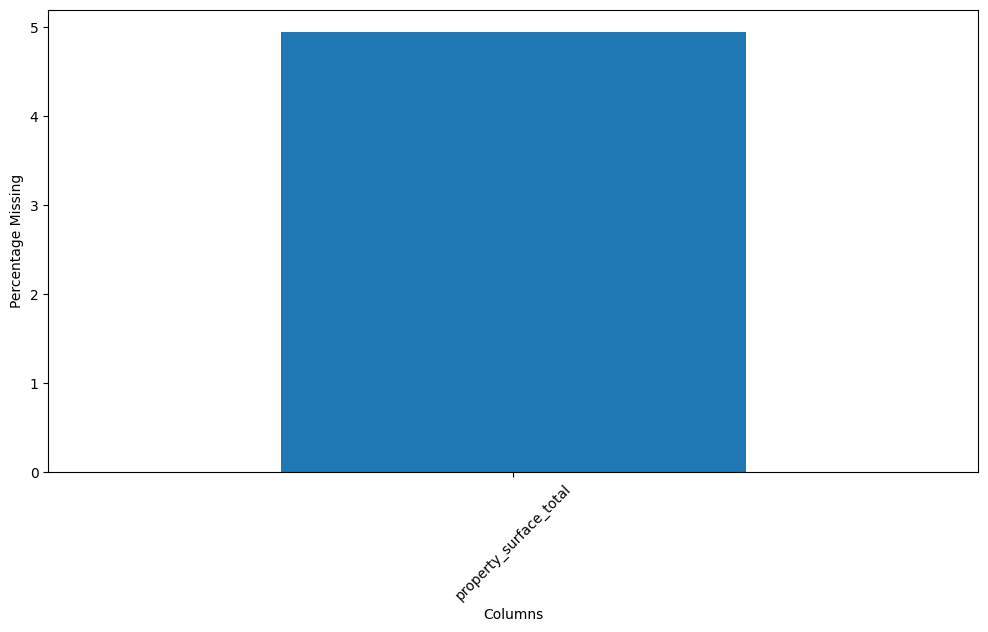

In [65]:
plot_missing_by_column(ds_train[['property_surface_total']])

In [66]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Reparación de datos faltantes en superficie cubierta**

In [67]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

**Post Imputación de Superficie total**

property_surface_total    0.0
dtype: float64


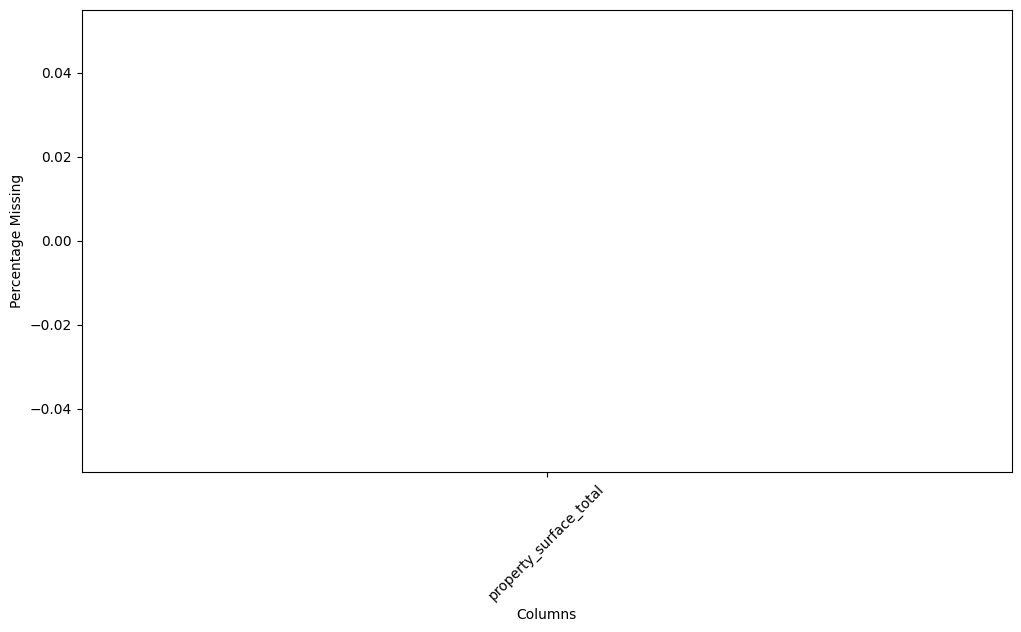

In [68]:
plot_missing_by_column(ds_train[['property_surface_total']])

**Pre Imputación de superficie cubierta**

In [69]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date                      end_date  \
44019   cI3QntP2et2Xc77KoSETcw== 2021-11-23 2022-01-27 00:00:00.000000000   
260786  /M1mtZDFpZN+Ft7G3TkaBA== 2021-04-14 2021-05-06 00:00:00.000000000   
154982  nD+GjyqD1w5llLdq9kchdg== 2021-02-03 2021-10-30 00:00:00.000000000   
370263  LKCI8G9Gy9/IfMXfQe9Lcg== 2021-11-08 2021-11-12 00:00:00.000000000   
216538  cWewSeZRnyxt3EoKK0HdFQ== 2021-12-22 2022-01-27 00:00:00.000000000   
...                          ...        ...                           ...   
59936   p9JHGQbjmIJ9m76VhnLPmg== 2021-01-25 2021-04-09 14:44:18.961351980   
272557  Tbvu0Av55dsHF7H2n9ZNpQ== 2021-02-21 2021-05-06 14:44:18.961351980   
316930  csvnrKJA1DgxnmPjiuy0vw== 2021-09-29 2021-12-15 00:00:00.000000000   
147978  RCIg+WxruzfqDvvw6vKMHg== 2021-08-19 2022-02-13 00:00:00.000000000   
373795  RoKrrzsUybb1Nfnh35ncpg== 2021-05-31 2021-06-05 00:00:00.000000000   

          latitud   longitud      place_l3 property_type  property_rooms  \
44019  -34.644770 -58.373330      Barracas  Departamento             2.0   
260786 -34.594578 -58.378963      Recoleta  Departamento             4.0   
154982 -34.592761 -58.416135  Barrio Norte  Departamento             2.0   
370263 -34.541876 -58.476966      Saavedra  Departamento             1.0   
216538 -34.578574 -58.437570       Palermo  Departamento             1.0   
...           ...        ...           ...           ...             ...   
59936  -34.557066 -58.464914      Belgrano  Departamento             2.0   
272557 -34.611192 -58.456651     Caballito            PH             4.0   
316930 -34.610276 -58.435731     Caballito  Departamento             4.0   
147978 -34.595644 -58.416938  Villa Crespo  Departamento             1.0   
373795 -34.566286 -58.434891       Palermo  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
44019                 1.0                    65.0                       NaN   
260786                3.0                   186.0                       NaN   
154982                1.0                    25.0                       NaN   
370263                1.0                    43.0                       NaN   
216538                1.0                    44.0                       NaN   
...                   ...                     ...                       ...   
59936                 1.0                    54.0                       NaN   
272557                3.0                   120.0                       NaN   
316930                3.0                   171.0                       NaN   
147978                1.0                    31.0                       NaN   
373795                3.0                   225.0                       NaN   

        property_price                                     property_title  
44019         165000.0                            Departamento - Barracas  
260786        500000.0  VENTA Departamento  - Recoleta Retiro - Recicl...  
154982         55000.0                        Departamento - Barrio Norte  
370263        154000.0  Monoambiente divisible con cochera a estrenar ...  
216538        115000.0  Hermoso monoambiente con cochera en pleno Pale...  
...                ...                                                ...  
59936         168000.0                          Departamento - Belgrano C  
272557        268000.0                               PH - Caballito Norte  
316930        335000.0  Espectacular Triplex de 4 ambientes con quinch...  
147978         75000.0     Luminoso Monoambiente en el barrio de Palermo!  
373795        970000.0  Inmejorable departamento a la venta en Palermo...  

[2598 rows x 13 columns]

property_surface_covered    3.480941
dtype: float64


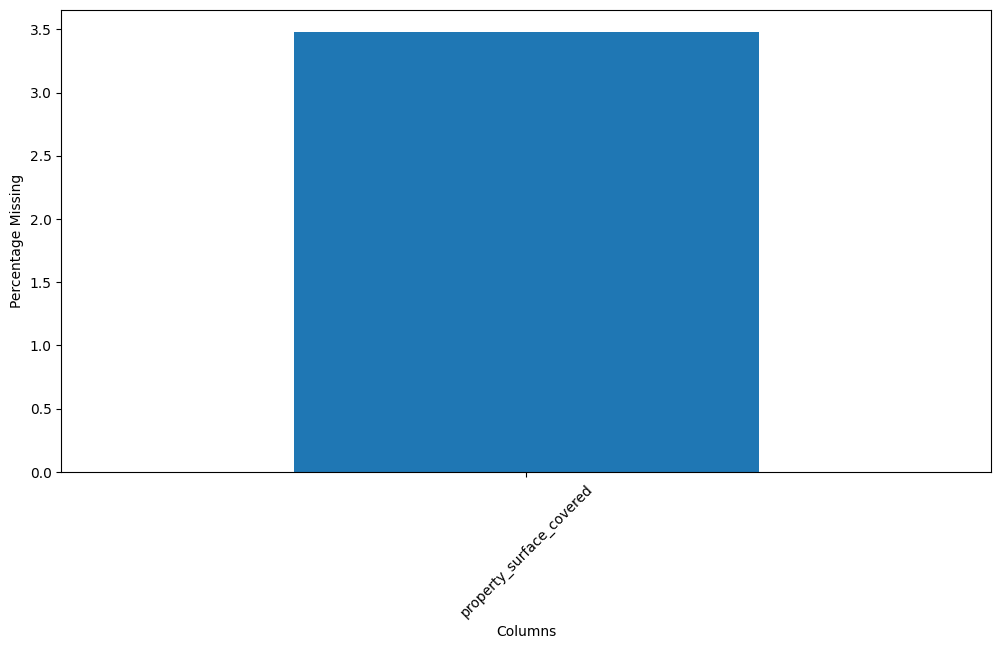

In [70]:
plot_missing_by_column(ds_train[['property_surface_covered']])

**Reparación de datos faltantes en Superficie cubierta**

In [71]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2331
PH               186
Casa              81
Name: property_type, dtype: int64

In [72]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [73]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 267


In [74]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 665


In [75]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.217836
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


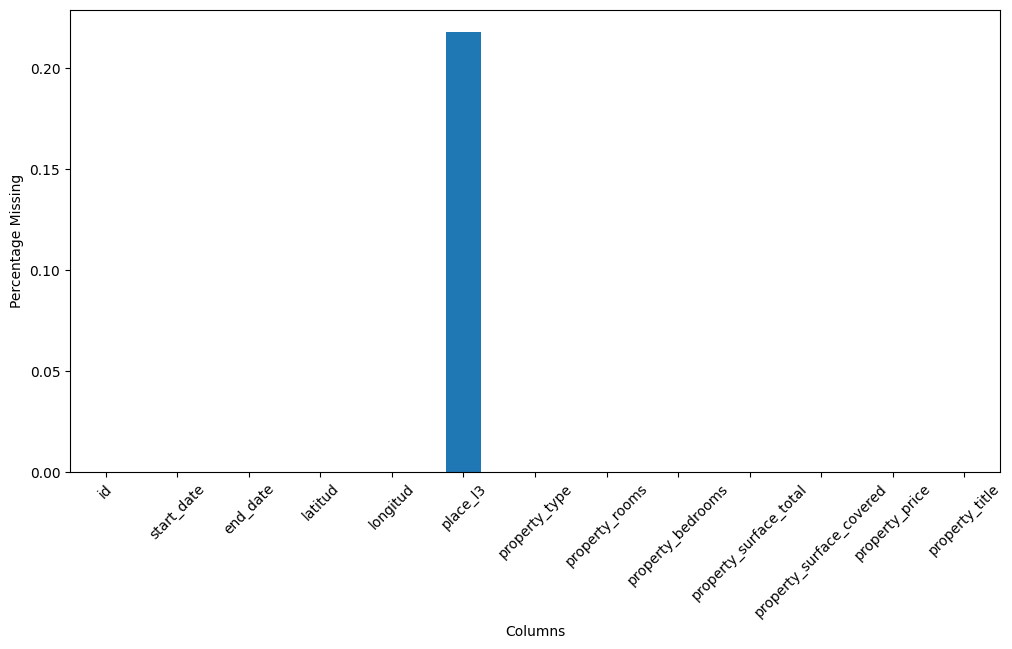

In [76]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

### Analisis de Valores Atipicos

#### Univariados

**Metodo IQR**

In [77]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()

In [78]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max


In [79]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

**Ambientes**

cantidad de datos del ds: 74368
outliers encontrados para los property_rooms: 1193
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


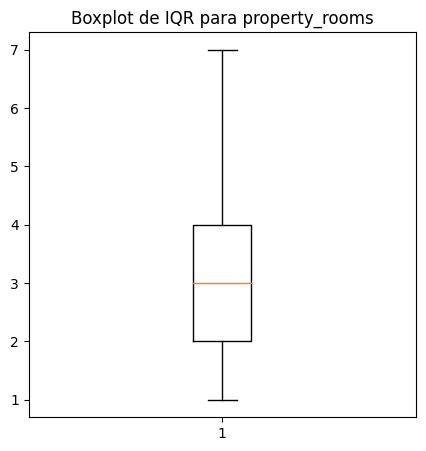

In [80]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

In [81]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 593. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 137. Constituyen al 0% de los datos


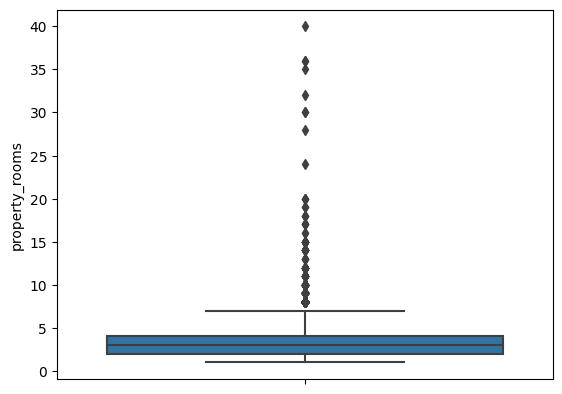

In [82]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

In [83]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


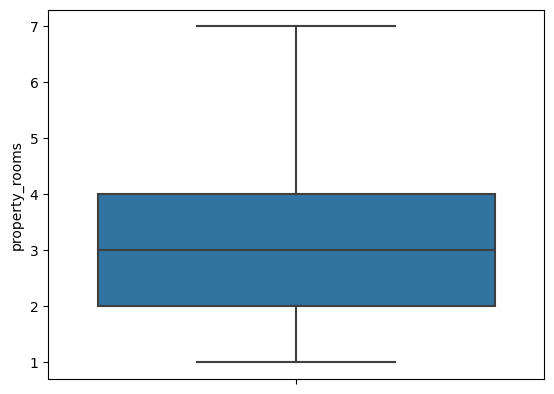

In [84]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

**Habitaciones**

Moderated outliers limits [min: -0.5,max: 3.5]
Severe outliers limits [min: -2.0,max: 5.0]


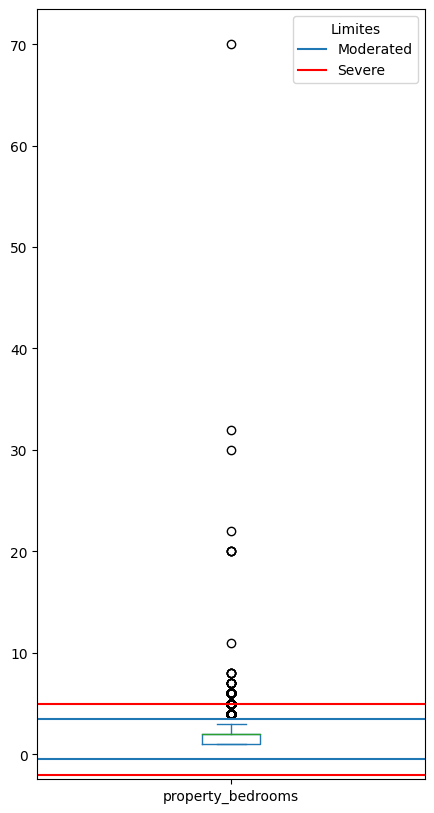

In [85]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73775
outliers encontrados para los property_bedrooms: 4337
hay 5% de outliers de property_bedrooms sobre el ds
limit sup: 3.5, limite inf: -0.5


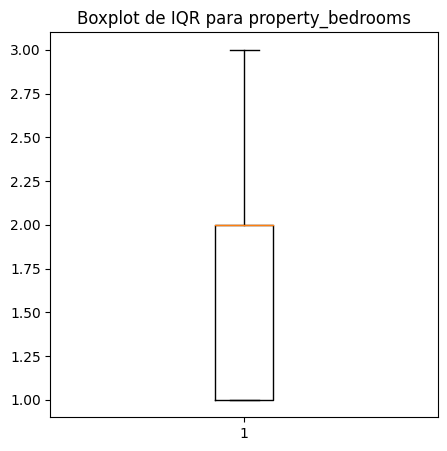

In [86]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [87]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 24. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 10. Constituyen al 0% de los datos


In [88]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en train
filas a eliminar:                               id start_date end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg==        NaT      NaT -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en test


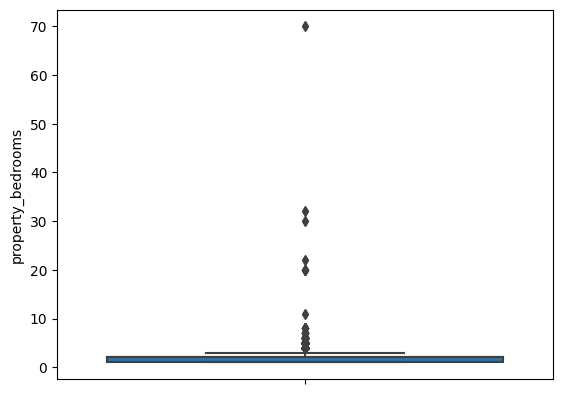

In [89]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

In [90]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_rooms])}")

Ejemplos: 


13

In [91]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 24 registros en train
Se han eliminado: 10 registros en test


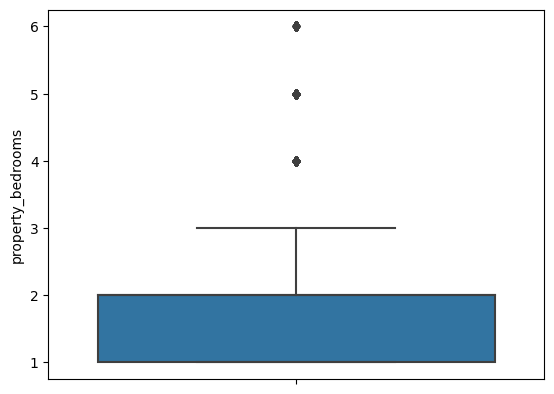

In [92]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

**Superficie Total**

cantidad de datos del ds: 73751
outliers encontrados para los property_surface_total: 5878
hay 7% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


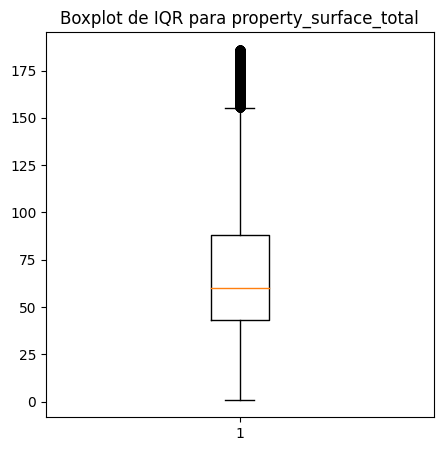

In [93]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

In [94]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 71 registros en train
Se han eliminado: 24 registros en test


In [95]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [96]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5562. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1362. Constituyen al 7% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


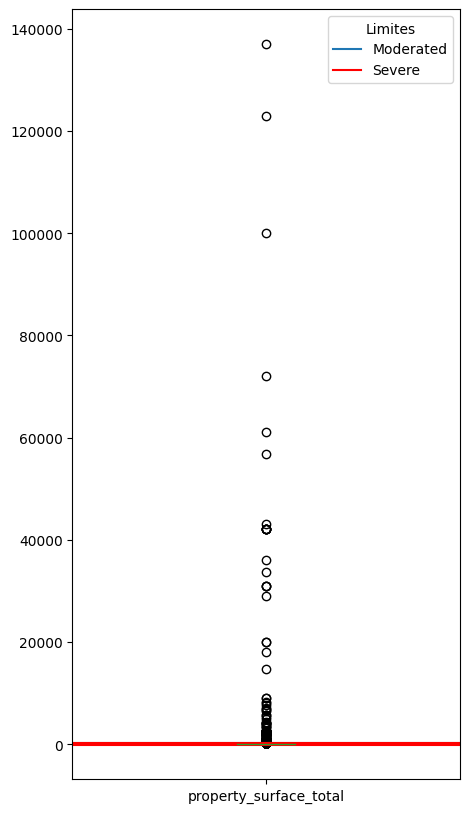

In [97]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

0-272       3189
272-500     2081
500-750      182
1000-inf      88
750-1000      22
Name: property_surface_total, dtype: int64


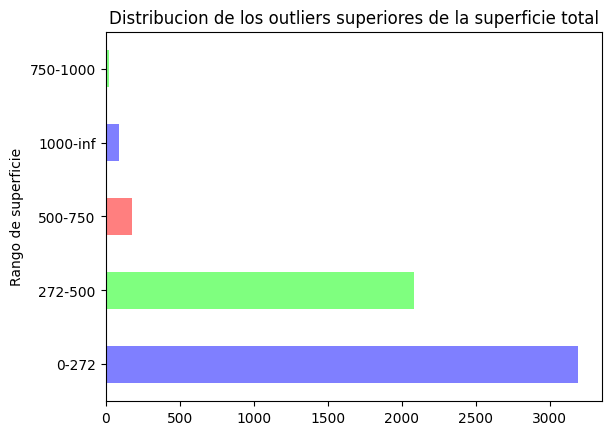

In [98]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [99]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")
    
    
    

Si bien la mediana de la superficite total es 222.5 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [100]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_test[ds_test['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")




Los outliers superiores de sup total en train son: 292. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 75. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


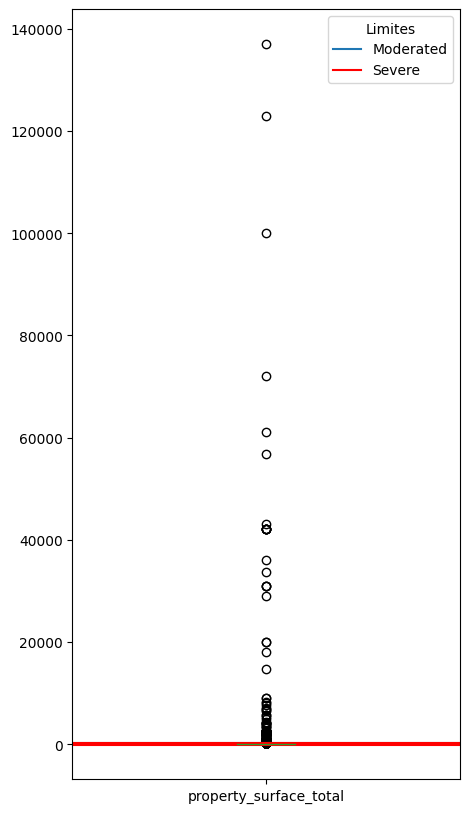

In [101]:
boxplot_with_outliers(ds_train, 'property_surface_total')

In [102]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 292 registros en train
Se han eliminado: 75 registros en test


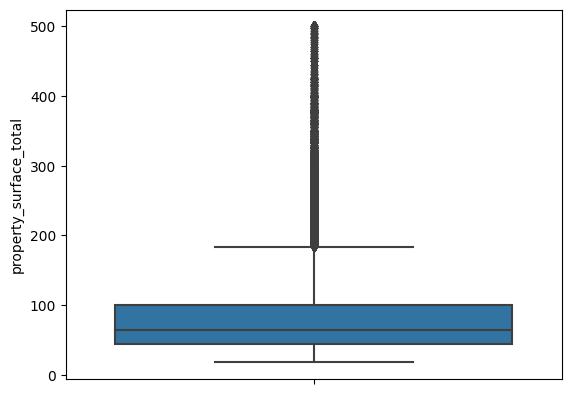

In [103]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

**Superficie cubierta**

cantidad de datos del ds: 73388
outliers encontrados para los property_surface_covered: 5830
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


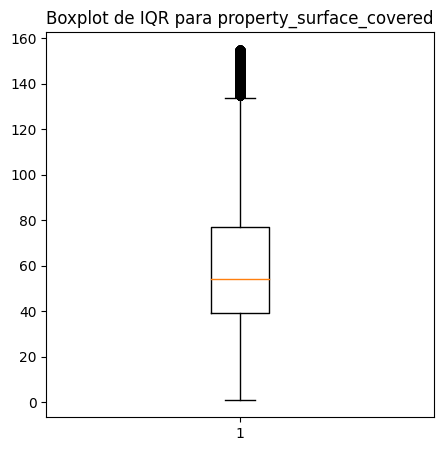

In [104]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [105]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5736. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1335. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


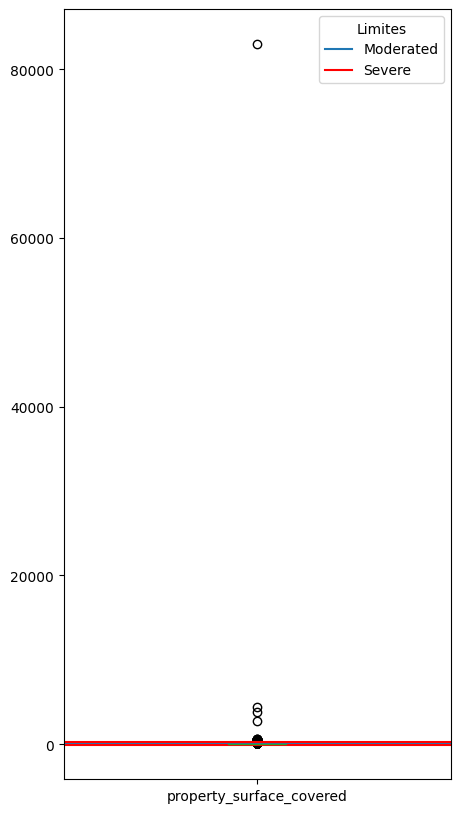

In [106]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


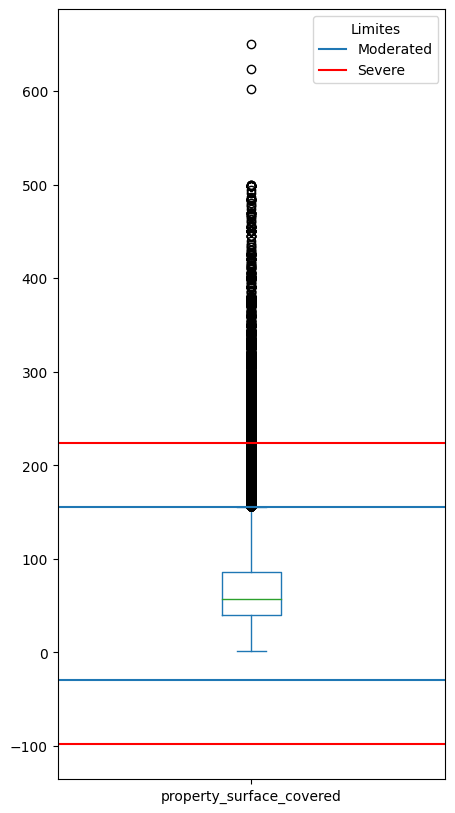

In [107]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3145
224-500     2321
500-750       65
1000-inf      22
750-1000       9
Name: property_surface_covered, dtype: int64


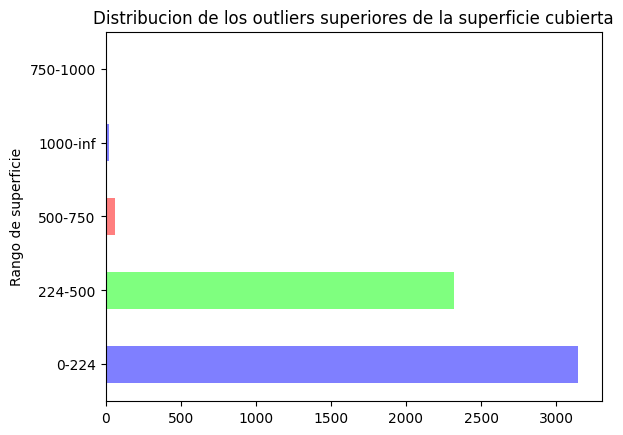

In [108]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

In [109]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 7 registros en train
Se han eliminado: 0 registros en test


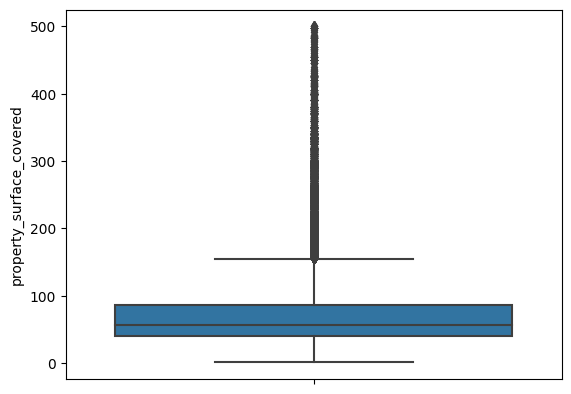

In [110]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

**Latitud y longitud**

cantidad de datos del ds: 73381
outliers encontrados para los latitud: 425
hay 0% de outliers de latitud sobre el ds
limit sup: -34.520151175500004, limite inf: -34.67261150750001


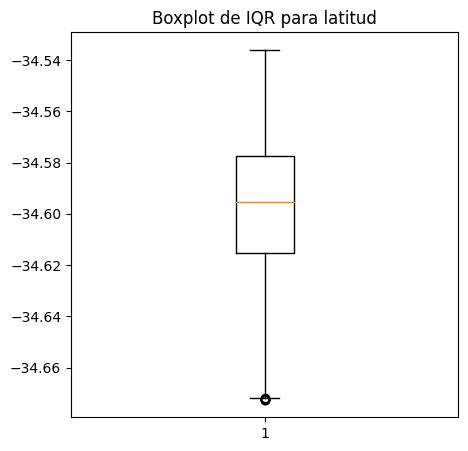

In [111]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73381
outliers encontrados para los longitud: 91
hay 0% de outliers de longitud sobre el ds
limit sup: -58.32471815, limite inf: -58.54989375


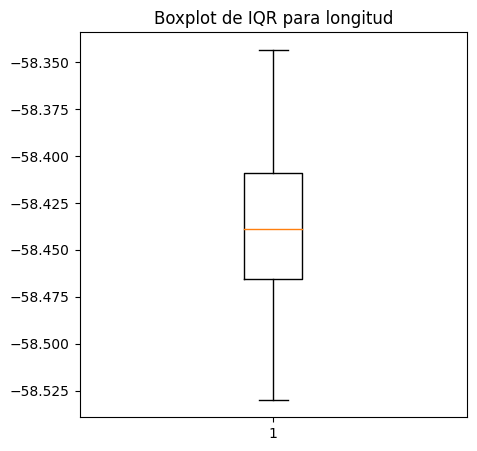

In [112]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

In [113]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73299. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 82. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17678. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 14. Constituyen al 0% de los datos


#### Metodo Z score

In [114]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

**Ambientes**

In [115]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

In [116]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 544. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 544. Constituyen al 3% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 3% de los datos


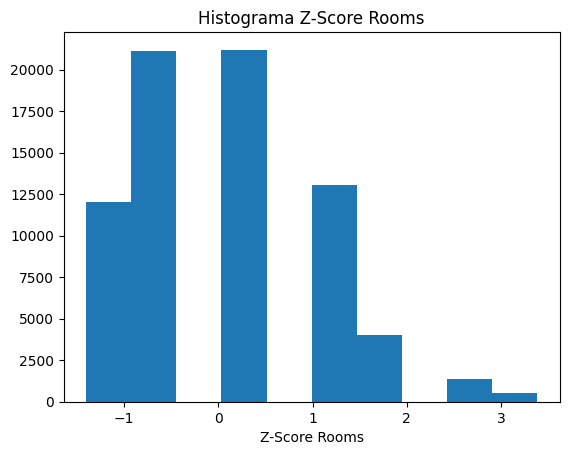

In [117]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

**Habitaciones**

In [118]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [119]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 651.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 651.Constituyen al 3% de los datos


id start_date   end_date    latitud   longitud  \
147609  G5xYxNYgvWSJfHUFcTPYOw== 2021-08-19 2021-09-15 -34.563980 -58.445430   
432133  fELJraN6ytvFE9Ip17K2Jw== 2021-12-16 2022-02-09 -34.608823 -58.495564   
84147   fMWvtL8AM9C46nTizyJ0SQ== 2021-02-05 2021-03-25 -34.614128 -58.437675   
340047  FrJ+gGQ3lQ7hm7eivmvt5A== 2021-06-01 2021-06-05 -34.590330 -58.391859   
271168  5ngfDx6EPiIw6lHKeMtl5Q== 2021-07-13 2021-07-17 -34.612324 -58.404356   
...                          ...        ...        ...        ...        ...   
115247  auCS1gj64/aivhiGMh/AvQ== 2021-12-07 2022-01-27 -34.664123 -58.504823   
90822   JwXtFAaQKP9s7FJprsJfuw== 2021-08-03 2022-04-01 -34.640264 -58.489327   
403616  Ra1h8DgGKofLY0OJ3uiP1g== 2021-08-13 2021-10-22 -34.602488 -58.490411   
186090  peC16weaVj/dxDi1xfn0Xw== 2021-08-07 2022-03-29 -34.609893 -58.414915   
127869  SrqzeeTw4A/Cmp0FKfnwCg== 2021-07-01 2021-07-03 -34.613363 -58.445880   

                place_l3 property_type  property_rooms  property_bedrooms  \
147609          Belgrano  Departamento             7.0                5.0   
432133  Villa del Parque          Casa             6.0                5.0   
84147          Caballito  Departamento             4.0                5.0   
340047      Barrio Norte  Departamento             6.0                5.0   
271168         Balvanera            PH             6.0                5.0   
...                  ...           ...             ...                ...   
115247         Mataderos            PH             6.0                5.0   
90822         Villa Luro          Casa             7.0                5.0   
403616  Villa del Parque            PH             6.0                5.0   
186090           Almagro  Departamento             5.0                5.0   
127869         Caballito            PH             7.0                6.0   

        property_surface_total  property_surface_covered  property_price  \
147609                   300.0                     300.0       1400000.0   
432133                   430.0                     390.0        690000.0   
84147                     82.0                      75.0        179000.0   
340047                   249.0                     240.0        590000.0   
271168                   310.0                     120.0        133000.0   
...                        ...                       ...             ...   
115247                   180.0                     150.0        265000.0   
90822                    457.0                     457.0        549900.0   
403616                   243.0                     214.0        334900.0   
186090                   249.0                     235.0        435000.0   
127869                   199.0                     180.0        235000.0   

                                           property_title  z_property_bedrooms  
147609  Venta Departamento Belgrano Barrancas Torre 30...             3.295108  
432133  Magnifica casa concordia al 2400, Villa Del Pa...             3.295108  
84147                            Departamento - Caballito             3.295108  
340047     Excelente Departamento en Venta - Barrio Norte             3.295108  
271168     OPORTUNIDAD 2 PHS, Local y Terraza. Balvanera!             3.295108  
...                                                   ...                  ...  
115247                         PH 6 AMBIENTES - MATADEROS             3.295108  
90822                                   Casa - Villa Luro             3.295108  
403616  VENTA PH FRENTE 6 AMBIENTES VILLA DEL PARQUE C...             3.295108  
186090    Departamento de 6 ambientes en Venta en Almagro             3.295108  
127869         VENTA PH CABALLITO 7 AMBIENTES CON TERRAZA             4.344821  

[651 rows x 14 columns]

In [120]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

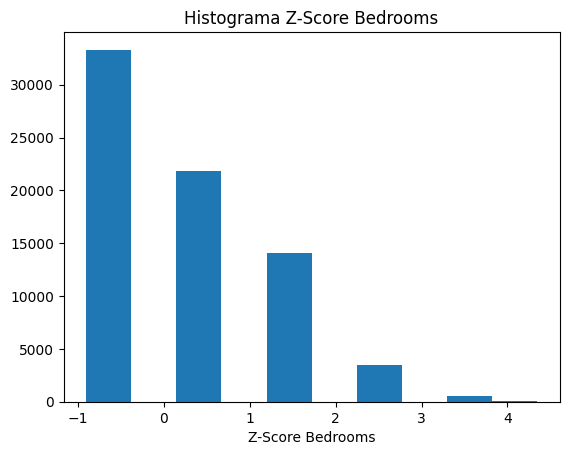

In [121]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

**Superficie Total**

In [122]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [123]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1864. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1864. Constituyen al 10% de los datos


id start_date   end_date    latitud   longitud  \
245497  q/zn7bwtzES7If72u3dBjQ== 2021-10-08 2021-10-25 -34.581321 -58.448343   
148466  CmVl9X41FErDqE7hRPr7+A== 2021-05-12 2021-06-05 -34.555590 -58.467689   
345438  eOMM2w0Ygu0cfesplT0tKg== 2021-01-29 2021-05-11 -34.639754 -58.447941   
147609  G5xYxNYgvWSJfHUFcTPYOw== 2021-08-19 2021-09-15 -34.563980 -58.445430   
236540  BKQ32DSFamOvG2SMkm831A== 2021-01-20 2021-06-05 -34.586252 -58.394430   

          place_l3 property_type  property_rooms  property_bedrooms  \
245497  Colegiales          Casa             4.0                3.0   
148466       Nuñez          Casa             5.0                4.0   
345438      Flores          Casa             5.0                4.0   
147609    Belgrano  Departamento             7.0                5.0   
236540    Recoleta  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
245497                   318.0                     190.0        189999.0   
148466                   406.0                     291.0        557000.0   
345438                   300.0                     148.0        170000.0   
147609                   300.0                     300.0       1400000.0   
236540                   300.0                     250.0        840000.0   

                                           property_title  \
245497        Casa en Venta 4 ambientes en Barrio cerrado   
148466                             Casa en Venta en Nuñez   
345438                                  Casa - Flores Sur   
147609  Venta Departamento Belgrano Barrancas Torre 30...   
236540    Deslumbrante todo Luz y Sol, 300m2   2 cocheras   

        z_property_surface_total  
245497                  3.518056  
148466                  4.851652  
345438                  3.245275  
147609                  3.245275  
236540                  3.245275

In [124]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

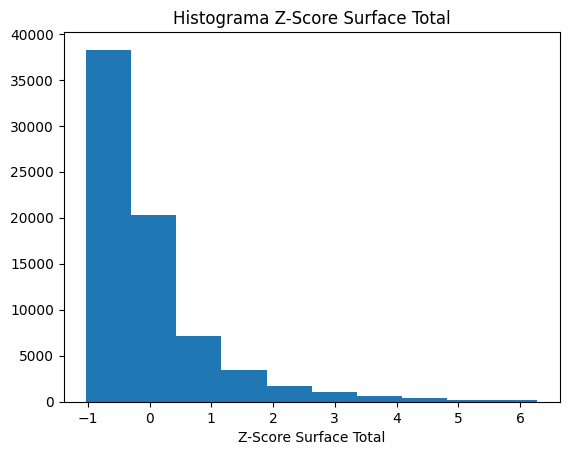

In [125]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

**Superficie Cubierta**

In [126]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [127]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1769. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1769. Constituyen al 9% de los datos


id start_date   end_date    latitud   longitud  \
148466  CmVl9X41FErDqE7hRPr7+A== 2021-05-12 2021-06-05 -34.555590 -58.467689   
147609  G5xYxNYgvWSJfHUFcTPYOw== 2021-08-19 2021-09-15 -34.563980 -58.445430   
423469  m3wzWm7r8qXXxNz3TqblPg== 2021-12-15 2022-01-27 -34.617534 -58.431091   
236540  BKQ32DSFamOvG2SMkm831A== 2021-01-20 2021-06-05 -34.586252 -58.394430   
191630  yxk1TMU6tJVRkftrWs8N4g== 2021-11-01 2022-01-27 -34.564532 -58.445179   
...                          ...        ...        ...        ...        ...   
459296  OeSJjGypn++qAuUJSsc0FQ== 2021-01-05 2021-08-23 -34.595642 -58.378990   
272850  uGqWSxu99KjzOduuxJO/+Q== 2021-02-21 2021-09-11 -34.610060 -58.361354   
90822   JwXtFAaQKP9s7FJprsJfuw== 2021-08-03 2022-04-01 -34.640264 -58.489327   
16910   Rox/vCROLtSwDLVAh/xb9g== 2021-06-10 2021-07-20 -34.613984 -58.391485   
431951  Ct6qgnyItKneV7vn3cdW2Q== 2021-12-16 2022-02-09 -34.628101 -58.500728   

               place_l3 property_type  property_rooms  property_bedrooms  \
148466            Nuñez          Casa             5.0                4.0   
147609         Belgrano  Departamento             7.0                5.0   
423469        Caballito  Departamento             4.0                3.0   
236540         Recoleta  Departamento             5.0                4.0   
191630         Belgrano  Departamento             6.0                4.0   
...                 ...           ...             ...                ...   
459296           Retiro  Departamento             6.0                4.0   
272850    Puerto Madero  Departamento             4.0                3.0   
90822        Villa Luro          Casa             7.0                5.0   
16910          Belgrano  Departamento             6.0                4.0   
431951  Velez Sarsfield          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
148466                   406.0                     291.0        557000.0   
147609                   300.0                     300.0       1400000.0   
423469                   254.0                     254.0        450000.0   
236540                   300.0                     250.0        840000.0   
191630                   311.0                     311.0       1300000.0   
...                        ...                       ...             ...   
459296                   313.0                     293.0        860000.0   
272850                   253.0                     253.0       1700000.0   
90822                    457.0                     457.0        549900.0   
16910                    390.0                     390.0       1290000.0   
431951                   345.0                     310.0        299000.0   

                                           property_title  \
148466                             Casa en Venta en Nuñez   
147609  Venta Departamento Belgrano Barrancas Torre 30...   
423469                         Departamento - P.Rivadavia   
236540    Deslumbrante todo Luz y Sol, 300m2   2 cocheras   
191630               Vista al Río, 3 Cocheras, Amenities!   
...                                                   ...   
459296  Excelente departamento en venta en torre de pr...   
272850                       Departamento - Puerto Madero   
90822                                   Casa - Villa Luro   
16910   RETASADO TORRE AZUL!!!! PISO muy importante de...   
431951     Casa 4 ambientes con deposito o local. Patio     

        z_property_surface_covered  
148466                    3.855315  
147609                    4.015744  
423469                    3.195777  
236540                    3.124475  
191630                    4.211823  
...                            ...  
459296                    3.890966  
272850                    3.177951  
90822                     6.814327  
16910                     5.620027  
431951                    4.193997  

[1769 rows x 14 columns]

In [128]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

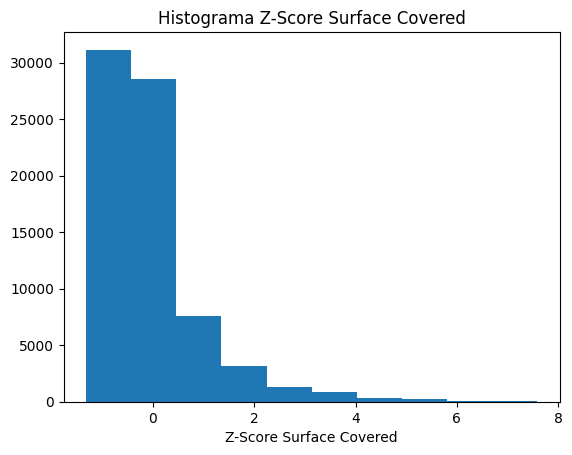

In [129]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

**Latitud y Longitud**

In [130]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [131]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 83. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 83. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
102559  4IhQ57Mo6xF0uwZEzG5D4g== 2021-05-28 2021-06-05 -31.977665 -64.559410   
102573  n14soIXd4x8yHnZdYBJ2ew== 2021-05-28 2021-06-05 -32.966465 -60.636101   
248772  bjxIbEY7mcbCYqnpCBMJcQ== 2021-04-29 2021-11-04 -27.469213 -58.830635   
102558  pKyg9nGvy0iGEQdJVjaaTQ== 2021-05-28 2021-06-05 -32.966356 -60.671536   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
...                          ...        ...        ...        ...        ...   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 -33.081030 -68.468140   
141150  oTIda/5B0LnUWmE9vLQhUw== 2021-03-10 2021-04-05 -28.880556 -63.978659   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.616670 -54.133330   
32705   5GwRAQ+RyU4uOxF0LOxKuw== 2021-02-08 2022-03-25 -24.770804 -65.400812   
190851  0Vab48sotk0177DS5U9TUQ== 2021-11-01 2022-01-27 -31.360967 -64.343824   

       place_l3 property_type  property_rooms  property_bedrooms  \
102559      NaN  Departamento             3.0                1.0   
102573      NaN  Departamento             6.0                4.0   
248772      NaN          Casa             4.0                3.0   
102558      NaN  Departamento             2.0                1.0   
61175       NaN          Casa             5.0                3.0   
...         ...           ...             ...                ...   
284385      NaN  Departamento             3.0                2.0   
141150      NaN          Casa             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
32705       NaN  Departamento             2.0                1.0   
190851      NaN          Casa             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
102559                    43.0                      43.0         95000.0   
102573                   100.0                     100.0         75000.0   
248772                   220.0                     220.0        295000.0   
102558                    37.0                      37.0         30000.0   
61175                    500.0                     200.0        208000.0   
...                        ...                       ...             ...   
284385                    62.0                      57.0         88000.0   
141150                   180.0                     130.0        195000.0   
405382                   205.0                     102.0        125000.0   
32705                    124.0                      64.0        240000.0   
190851                   150.0                      82.0         65000.0   

                                           property_title  z_latitud  
102559  Departamento a la venta en Rosario, toma como ...  16.663922  
102573       Departamento de pasillo A RECICLAR de 100mts  10.364370  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS  45.386848  
102558            Departamento en venta de un dormitorio   10.365065  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  19.935281  
...                                                   ...        ...  
284385   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO   9.634488  
141150  CASA en entorno privilegiado con parque y pileta.  36.395314  
405382      Depto Venta, Fincas de San Vicente II,  3 amb  50.818321  
32705             Venta Departamento Terrazas Golf Pilará  62.578160  
190851               Dúplex barrio Los Prados - La Calera  20.592849  

[83 rows x 14 columns]

In [132]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 8. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 8. Constituyen al 0% de los datos


id start_date                      end_date  \
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 14:44:18.961351980   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 14:44:18.961351980   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
131188 -41.083002 -71.182747      NaN  Departamento             2.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   
208085 -41.085373 -71.185766      NaN  Departamento             2.0   
155333 -41.164123 -71.415420      NaN          Casa             3.0   
410404 -38.964493 -68.075830      NaN          Casa             7.0   
457631 -53.788624 -67.718089      NaN  Departamento             3.0   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   
106297 -41.086352 -71.185720      NaN  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
131188                1.0                    66.0                      56.0   
10486                 3.0                   100.0                     100.0   
208085                1.0                    60.0                      50.0   
155333                2.0                    70.0                      70.0   
410404                5.0                   218.0                     218.0   
457631                2.0                   121.0                     100.0   
105792                1.0                    53.0                      53.0   
106297                1.0                    53.0                      53.0   

        property_price                                     property_title  \
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   
155333        380000.0  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...   
410404        230000.0  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...   
457631        375000.0                Depto 3 ambientes Arboris Las Lomas   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   

         z_latitud  
131188  -41.345327  
10486   -41.860247  
208085  -41.360436  
155333  -41.862144  
410404  -27.848506  
457631 -122.291656  
105792  -41.357417  
106297  -41.366671

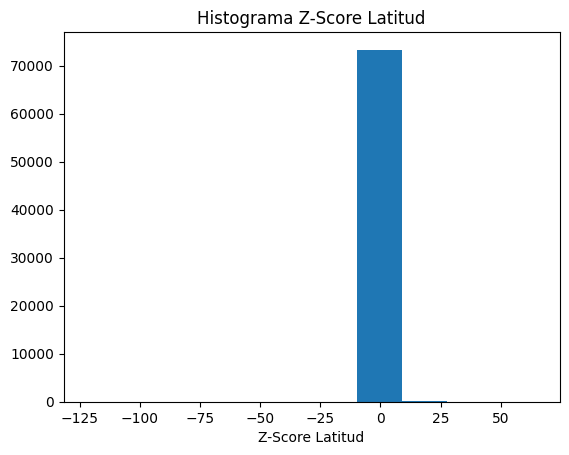

In [133]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [134]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date   end_date    latitud   longitud  \
16673   FSL3ErQeO/MvZI1wrpYK0A== 2021-06-10 2022-03-31 -34.626174 -58.454497   
44019   cI3QntP2et2Xc77KoSETcw== 2021-11-23 2022-01-27 -34.644770 -58.373330   
132166  CCbDzxaBSIZUA/NCFlRQAw== 2021-02-18 2021-02-20 -34.579603 -58.482543   
322814  mQjxkx543wRFWv9DCLznQA== 2021-06-15 2021-07-05 -34.593786 -58.432528   
172798  XtpCeP8+lE52HHM0KnhOoA== 2021-05-11 2021-08-09 -34.626703 -58.420027   

             place_l3 property_type  property_rooms  property_bedrooms  \
16673          Flores  Departamento             3.0                2.0   
44019        Barracas  Departamento             2.0                1.0   
132166  Villa Urquiza            PH             4.0                3.0   
322814        Palermo  Departamento             3.0                2.0   
172798          Boedo            PH             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
16673                     62.0                      58.0         99000.0   
44019                     65.0                      65.0        165000.0   
132166                   108.0                      59.0        120000.0   
322814                    58.0                      54.0        190000.0   
172798                    82.0                      82.0        120000.0   

                                           property_title  z_latitud  
16673   Exc. depto. 3 amb c/ balcón -  cochera fija op...  -0.209480  
44019                             Departamento - Barracas  -0.327953  
132166                                 PH - Villa Urquiza   0.087220  
322814                             Departamento - Palermo  -0.003140  
172798                 PH de 3 ambientes con patio. Boedo  -0.212850

In [135]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 6. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 6. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
173667      NaN  Departamento             4.0                3.0   
134196      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
405382      NaN          Casa             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
173667                    98.0                      88.0        269000.0   
134196                   105.0                     105.0        200000.0   
234893                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
405382                   205.0                     102.0        125000.0   

                                           property_title  z_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    6.868546  
173667  Venta departamento 4 amb Vicente Lopez con cochea   11.487390  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    6.868546  
234893  Venta departamento 4 amb Vicente Lopez con cochea   11.487390  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.463279  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   16.795872

In [136]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 82. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 82. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
102559  4IhQ57Mo6xF0uwZEzG5D4g== 2021-05-28 2021-06-05 -31.977665 -64.559410   
102573  n14soIXd4x8yHnZdYBJ2ew== 2021-05-28 2021-06-05 -32.966465 -60.636101   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 -41.083002 -71.182747   
102558  pKyg9nGvy0iGEQdJVjaaTQ== 2021-05-28 2021-06-05 -32.966356 -60.671536   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
...                          ...        ...        ...        ...        ...   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 -41.084900 -71.187159   
141150  oTIda/5B0LnUWmE9vLQhUw== 2021-03-10 2021-04-05 -28.880556 -63.978659   
32705   5GwRAQ+RyU4uOxF0LOxKuw== 2021-02-08 2022-03-25 -24.770804 -65.400812   
190851  0Vab48sotk0177DS5U9TUQ== 2021-11-01 2022-01-27 -31.360967 -64.343824   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 -41.086352 -71.185720   

       place_l3 property_type  property_rooms  property_bedrooms  \
102559      NaN  Departamento             3.0                1.0   
102573      NaN  Departamento             6.0                4.0   
131188      NaN  Departamento             2.0                1.0   
102558      NaN  Departamento             2.0                1.0   
61175       NaN          Casa             5.0                3.0   
...         ...           ...             ...                ...   
105792      NaN  Departamento             1.0                1.0   
141150      NaN          Casa             4.0                3.0   
32705       NaN  Departamento             2.0                1.0   
190851      NaN          Casa             3.0                2.0   
106297      NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
102559                    43.0                      43.0         95000.0   
102573                   100.0                     100.0         75000.0   
131188                    66.0                      56.0        135000.0   
102558                    37.0                      37.0         30000.0   
61175                    500.0                     200.0        208000.0   
...                        ...                       ...             ...   
105792                    53.0                      53.0        145000.0   
141150                   180.0                     130.0        195000.0   
32705                    124.0                      64.0        240000.0   
190851                   150.0                      82.0         65000.0   
106297                    53.0                      53.0        145000.0   

                                           property_title  z_longitud  
102559  Departamento a la venta en Rosario, toma como ...  -23.809820  
102573       Departamento de pasillo A RECICLAR de 100mts   -8.529995  
131188  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO   -49.605245  
102558            Departamento en venta de un dormitorio    -8.668001  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  -23.290581  
...                                                   ...         ...  
105792  Villa Huapi - Dina Huapi - Río Negro - APTO CR...  -49.622427  
141150  CASA en entorno privilegiado con parque y pileta.  -21.548013  
32705             Venta Departamento Terrazas Golf Pilará  -27.086766  
190851               Dúplex barrio Los Prados - La Calera  -22.970191  
106297  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...  -49.616822  

[82 rows x 14 columns]

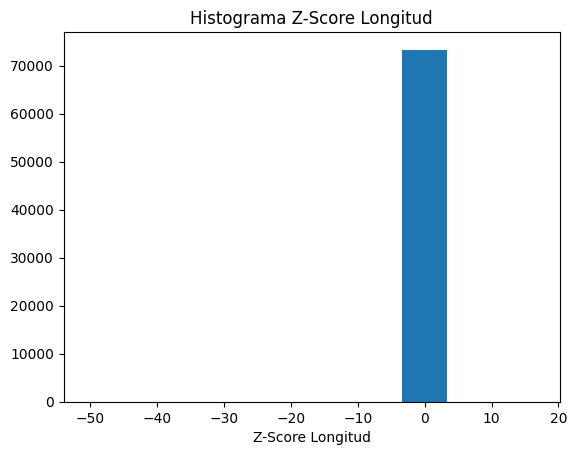

In [137]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

**Metodo Z Score modificado**

In [138]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

**Ambientes**

In [139]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

In [140]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [141]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

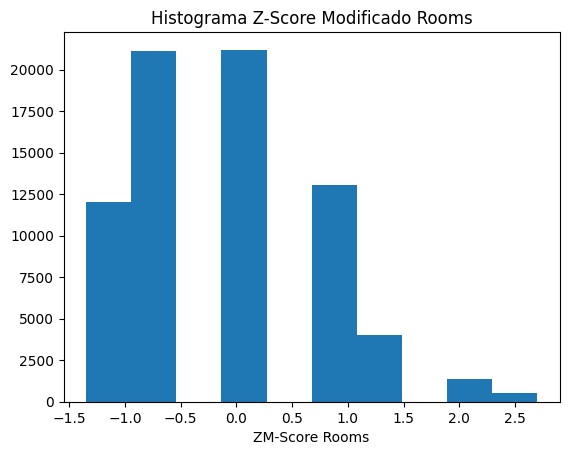

In [142]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

**Habitaciones**

In [143]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [144]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [145]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

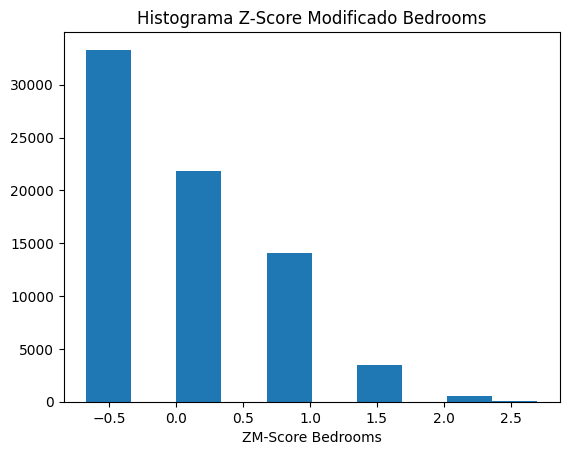

In [146]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

**Superficie Total**

In [147]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date   end_date    latitud   longitud  \
16673   FSL3ErQeO/MvZI1wrpYK0A== 2021-06-10 2022-03-31 -34.626174 -58.454497   
44019   cI3QntP2et2Xc77KoSETcw== 2021-11-23 2022-01-27 -34.644770 -58.373330   
132166  CCbDzxaBSIZUA/NCFlRQAw== 2021-02-18 2021-02-20 -34.579603 -58.482543   
322814  mQjxkx543wRFWv9DCLznQA== 2021-06-15 2021-07-05 -34.593786 -58.432528   
172798  XtpCeP8+lE52HHM0KnhOoA== 2021-05-11 2021-08-09 -34.626703 -58.420027   

             place_l3 property_type  property_rooms  property_bedrooms  \
16673          Flores  Departamento             3.0                2.0   
44019        Barracas  Departamento             2.0                1.0   
132166  Villa Urquiza            PH             4.0                3.0   
322814        Palermo  Departamento             3.0                2.0   
172798          Boedo            PH             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
16673                     62.0                      58.0         99000.0   
44019                     65.0                      65.0        165000.0   
132166                   108.0                      59.0        120000.0   
322814                    58.0                      54.0        190000.0   
172798                    82.0                      82.0        120000.0   

                                           property_title  \
16673   Exc. depto. 3 amb c/ balcón -  cochera fija op...   
44019                             Departamento - Barracas   
132166                                 PH - Villa Urquiza   
322814                             Departamento - Palermo   
172798                 PH de 3 ambientes con patio. Boedo   

        zm_property_surface_total  
16673                   -0.056208  
44019                    0.028104  
132166                   1.236583  
322814                  -0.168625  
172798                   0.505875

In [148]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5463. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5463. Constituyen al 30% de los datos


id start_date                      end_date  \
76463   KnoqugpHHyWBbvscExlJjQ== 2021-07-17 2021-07-18 00:00:00.000000000   
245497  q/zn7bwtzES7If72u3dBjQ== 2021-10-08 2021-10-25 00:00:00.000000000   
44773   j8eLUfjzDAChsnaZ938UBw== 2021-01-26 2021-07-02 00:00:00.000000000   
148466  CmVl9X41FErDqE7hRPr7+A== 2021-05-12 2021-06-05 00:00:00.000000000   
215887  zUYFiHd7zksRWa4DCS3wjQ== 2021-12-22 2022-01-27 00:00:00.000000000   
...                          ...        ...                           ...   
112005  IvaSJ8CF2LVH8L+pU7vLUQ== 2021-01-23 2021-04-07 14:44:18.961351980   
431951  Ct6qgnyItKneV7vn3cdW2Q== 2021-12-16 2022-02-09 00:00:00.000000000   
360250  ZDrM5kwmH4dxsWYrjoueJA== 2021-06-11 2022-08-05 00:00:00.000000000   
373795  RoKrrzsUybb1Nfnh35ncpg== 2021-05-31 2021-06-05 00:00:00.000000000   
432671  GrraGn/LK2b+8IXkzc7v/Q== 2021-05-04 2021-06-05 00:00:00.000000000   

          latitud   longitud           place_l3 property_type  property_rooms  \
76463  -34.551127 -58.469028              Nuñez  Departamento             5.0   
245497 -34.581321 -58.448343         Colegiales          Casa             4.0   
44773  -34.633077 -58.398300   Parque Patricios          Casa             6.0   
148466 -34.555590 -58.467689              Nuñez          Casa             5.0   
215887 -34.650653 -58.479309  Parque Avellaneda            PH             5.0   
...           ...        ...                ...           ...             ...   
112005 -34.562958 -58.446183           Belgrano  Departamento             5.0   
431951 -34.628101 -58.500728    Velez Sarsfield          Casa             4.0   
360250 -34.590495 -58.394325           Recoleta  Departamento             6.0   
373795 -34.566286 -58.434891            Palermo  Departamento             4.0   
432671 -34.634739 -58.479813           Floresta            PH             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
76463                 3.0                   190.0                     160.0   
245497                3.0                   318.0                     190.0   
44773                 4.0                   207.0                     207.0   
148466                4.0                   406.0                     291.0   
215887                3.0                   262.0                     150.0   
...                   ...                     ...                       ...   
112005                4.0                   215.0                     200.0   
431951                3.0                   345.0                     310.0   
360250                3.0                   198.0                     185.0   
373795                3.0                   225.0                     225.0   
432671                4.0                   257.0                     190.0   

        property_price                                     property_title  \
76463         496900.0      Triplex c/terraza - Parrilla + oficina  Núñez   
245497        189999.0        Casa en Venta 4 ambientes en Barrio cerrado   
44773         399000.0  Excelente casa con jardin parrilla y doble coc...   
148466        557000.0                             Casa en Venta en Nuñez   
215887        125000.0  PH TIPO CASA DE 4 AMB CON GARAGE Y TERRAZA - P...   
...                ...                                                ...   
112005        590000.0  Arribeños esq Virrey del Pino - Torre de categ...   
431951        299000.0     Casa 4 ambientes con deposito o local. Patio     
360250        600000.0                            Departamento - Recoleta   
373795        970000.0  Inmejorable departamento a la venta en Palermo...   
432671        270000.0  PH · 5 AMBIENTES C/ PATIO Y COCHERA · CANDELAR...   

        zm_property_surface_total  
76463                    3.541125  
245497                   7.138458  
44773                    4.018896  
148466                   9.611625  
215887                   5.564625  
...                           ...  
112005

In [149]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

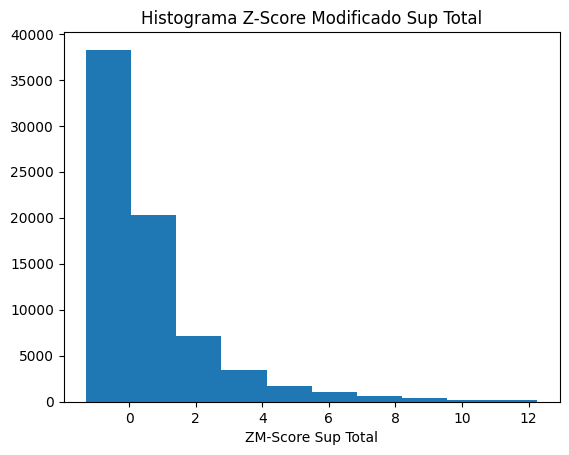

In [150]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

**Superficie Cubierta**

In [151]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

In [152]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date   end_date    latitud   longitud  \
260786  /M1mtZDFpZN+Ft7G3TkaBA== 2021-04-14 2021-05-06 -34.594578 -58.378963   
245497  q/zn7bwtzES7If72u3dBjQ== 2021-10-08 2021-10-25 -34.581321 -58.448343   
185062  19gdMNY833sJYi6nZsLOAQ== 2021-06-06 2021-07-28 -34.575595 -58.422609   
44773   j8eLUfjzDAChsnaZ938UBw== 2021-01-26 2021-07-02 -34.633077 -58.398300   
148466  CmVl9X41FErDqE7hRPr7+A== 2021-05-12 2021-06-05 -34.555590 -58.467689   
...                          ...        ...        ...        ...        ...   
316930  csvnrKJA1DgxnmPjiuy0vw== 2021-09-29 2021-12-15 -34.610276 -58.435731   
431951  Ct6qgnyItKneV7vn3cdW2Q== 2021-12-16 2022-02-09 -34.628101 -58.500728   
360250  ZDrM5kwmH4dxsWYrjoueJA== 2021-06-11 2022-08-05 -34.590495 -58.394325   
373795  RoKrrzsUybb1Nfnh35ncpg== 2021-05-31 2021-06-05 -34.566286 -58.434891   
432671  GrraGn/LK2b+8IXkzc7v/Q== 2021-05-04 2021-06-05 -34.634739 -58.479813   

                place_l3 property_type  property_rooms  property_bedrooms  \
260786          Recoleta  Departamento             4.0                3.0   
245497        Colegiales          Casa             4.0                3.0   
185062           Palermo  Departamento             5.0                3.0   
44773   Parque Patricios          Casa             6.0                4.0   
148466             Nuñez          Casa             5.0                4.0   
...                  ...           ...             ...                ...   
316930         Caballito  Departamento             4.0                3.0   
431951   Velez Sarsfield          Casa             4.0                3.0   
360250          Recoleta  Departamento             6.0                3.0   
373795           Palermo  Departamento             4.0                3.0   
432671          Floresta            PH             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
260786                   186.0                     186.0        500000.0   
245497                   318.0                     190.0        189999.0   
185062                   177.0                     177.0        580000.0   
44773                    207.0                     207.0        399000.0   
148466                   406.0                     291.0        557000.0   
...                        ...                       ...             ...   
316930                   171.0                     171.0        335000.0   
431951                   345.0                     310.0        299000.0   
360250                   198.0                     185.0        600000.0   
373795                   225.0                     225.0        970000.0   
432671                   257.0                     190.0        270000.0   

                                           property_title  \
260786  VENTA Departamento  - Recoleta Retiro - Recicl...   
245497        Casa en Venta 4 ambientes en Barrio cerrado   
185062  Palermo - Botánico 5 ambientes con cochera y b...   
44773   Excelente casa con jardin parrilla y doble coc...   
148466                             Casa en Venta en Nuñez   
...                                                   ...   
316930  Espectacular Triplex de 4 ambientes con quinch...   
431951     Casa 4 ambientes con deposito o local. Patio     
360250                            Departamento - Recoleta   
373795  Inmejorable departamento a la venta en Palermo...   
432671  PH · 5 AMBIENTES C/ PATIO Y COCHERA · CANDELAR...   

        zm_property_surface_covered  
260786                     4.350525  
245497                     4.485425  
185062                     4.047000  
44773                      5.058750  
148466                     7.891650  
...                             ...  
316930                     3.844650  
431951                     8.532425  
360250                     4.316800  
373795                     5.665800  
432671                     4.485425  

[5238 rows x 14 columns]

In [153]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

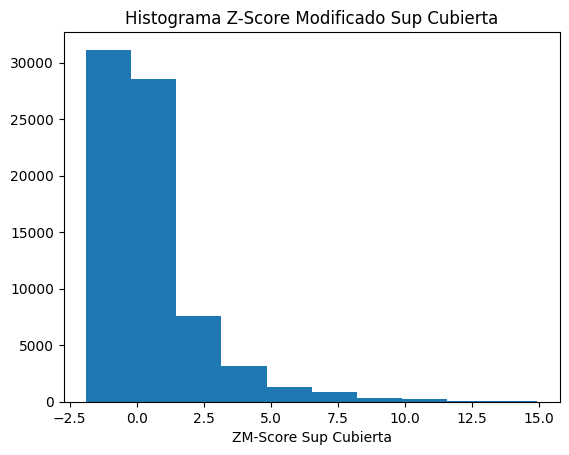

In [154]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

**Latitud y longitud**

In [155]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

In [156]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date   end_date    latitud   longitud  \
102559  4IhQ57Mo6xF0uwZEzG5D4g== 2021-05-28 2021-06-05 -31.977665 -64.559410   
102573  n14soIXd4x8yHnZdYBJ2ew== 2021-05-28 2021-06-05 -32.966465 -60.636101   
248772  bjxIbEY7mcbCYqnpCBMJcQ== 2021-04-29 2021-11-04 -27.469213 -58.830635   
102558  pKyg9nGvy0iGEQdJVjaaTQ== 2021-05-28 2021-06-05 -32.966356 -60.671536   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
...                          ...        ...        ...        ...        ...   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 -33.081030 -68.468140   
141150  oTIda/5B0LnUWmE9vLQhUw== 2021-03-10 2021-04-05 -28.880556 -63.978659   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.616670 -54.133330   
32705   5GwRAQ+RyU4uOxF0LOxKuw== 2021-02-08 2022-03-25 -24.770804 -65.400812   
190851  0Vab48sotk0177DS5U9TUQ== 2021-11-01 2022-01-27 -31.360967 -64.343824   

       place_l3 property_type  property_rooms  property_bedrooms  \
102559      NaN  Departamento             3.0                1.0   
102573      NaN  Departamento             6.0                4.0   
248772      NaN          Casa             4.0                3.0   
102558      NaN  Departamento             2.0                1.0   
61175       NaN          Casa             5.0                3.0   
...         ...           ...             ...                ...   
284385      NaN  Departamento             3.0                2.0   
141150      NaN          Casa             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
32705       NaN  Departamento             2.0                1.0   
190851      NaN          Casa             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
102559                    43.0                      43.0         95000.0   
102573                   100.0                     100.0         75000.0   
248772                   220.0                     220.0        295000.0   
102558                    37.0                      37.0         30000.0   
61175                    500.0                     200.0        208000.0   
...                        ...                       ...             ...   
284385                    62.0                      57.0         88000.0   
141150                   180.0                     130.0        195000.0   
405382                   205.0                     102.0        125000.0   
32705                    124.0                      64.0        240000.0   
190851                   150.0                      82.0         65000.0   

                                           property_title  zm_latitud  
102559  Departamento a la venta en Rosario, toma como ...   92.633516  
102573       Departamento de pasillo A RECICLAR de 100mts   57.642721  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS  252.174713  
102558            Departamento en venta de un dormitorio    57.646582  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  110.804246  
...                                                   ...         ...  
284385   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO   53.588598  
141150  CASA en entorno privilegiado con parque y pileta.  202.231326  
405382      Depto Venta, Fincas de San Vicente II,  3 amb  282.343769  
32705             Venta Departamento Terrazas Golf Pilará  347.663676  
190851               Dúplex barrio Los Prados - La Calera  114.456700  

[83 rows x 14 columns]

In [157]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 17. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 17. Constituyen al 0% de los datos


id start_date                      end_date  \
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
208451  r5h8YGMTL3OG6u8wekYDWg== 2021-02-01 2021-05-02 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 14:44:18.961351980   
65844   0tGMaOsXgkOAnx8GSH1pmA== 2021-05-15 2021-05-25 00:00:00.000000000   
270589  tQfZpYXLoOwWd990nrLpBg== 2021-07-13 2021-10-16 00:00:00.000000000   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 00:00:00.000000000   
171545  2IMMhWMUVZd6htI0Xo9m8Q== 2021-04-19 2021-06-05 00:00:00.000000000   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 14:44:18.961351980   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
308365  j4l0DxeSfN6KnNMYSo6bSg== 2021-04-28 2021-05-01 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
271609  pMxqmA1WxzslUoiQPG4qFg== 2021-06-19 2021-07-05 00:00:00.000000000   
317537  x1BlLb49Up0aSX9yuzhrMw== 2021-09-29 2022-03-25 00:00:00.000000000   
82540   j0CggSFoqC9J+F1N9h91wg== 2021-03-12 2021-03-13 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   

          latitud   longitud         place_l3 property_type  property_rooms  \
131188 -41.083002 -71.182747              NaN  Departamento             2.0   
208451 -34.694366 -58.468208     Villa Lugano  Departamento             2.0   
10486  -41.163826 -71.438923              NaN          Casa             4.0   
65844  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
270589 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
250707 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
171545 -34.694322 -58.469549     Villa Lugano            PH             3.0   
208085 -41.085373 -71.185766              NaN  Departamento             2.0   
155333 -41.164123 -71.415420              NaN          Casa             3.0   
308365 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
410404 -38.964493 -68.075830              NaN          Casa             7.0   
457631 -53.788624 -67.718089              NaN  Departamento             3.0   
271609 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
317537 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
82540  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
105792 -41.084900 -71.187159              NaN  Departamento             1.0   
106297 -41.086352 -71.185720              NaN  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
131188                1.0                    66.0                      56.0   
208451                1.0                    74.0                      42.0   
10486                 3.0                   100.0                     100.0   
65844                 3.0                    91.0                      79.0   
270589                2.0                    70.0                      50.0   
250707                3.0                    91.0                      79.0   
171545                2.0                    70.0                      70.0   
208085                1.0                    60.0                      50.0   
155333                2.0                    70.0                      70.0   
308365                1.0                    80.0                      80.0   
410404                5.0                   218.0                     218.0   
457631                2.0                   121.0                     100.0   
271609                2.0                    70.0                      50.0   
317537                3.0                    91.0                      79.0   
82540                 3.0          

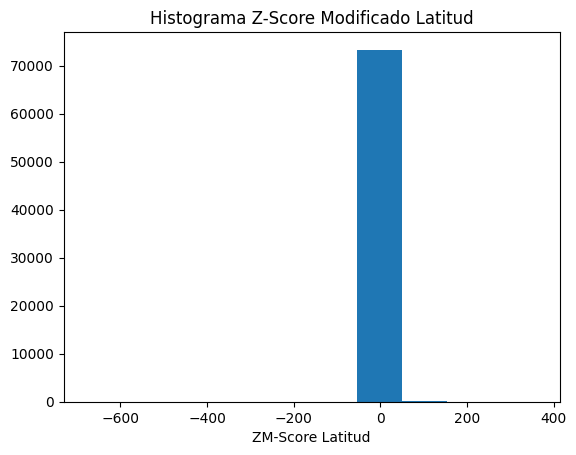

In [158]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [159]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

In [160]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
173667      NaN  Departamento             4.0                3.0   
134196      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
405382      NaN          Casa             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
173667                    98.0                      88.0        269000.0   
134196                   105.0                     105.0        200000.0   
234893                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
405382                   205.0                     102.0        125000.0   

                                           property_title  zm_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.263697  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.801168  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.263697  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.801168  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.224298  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   103.599554

In [161]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 85. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 85. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
102559  4IhQ57Mo6xF0uwZEzG5D4g== 2021-05-28 2021-06-05 -31.977665 -64.559410   
102573  n14soIXd4x8yHnZdYBJ2ew== 2021-05-28 2021-06-05 -32.966465 -60.636101   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 -41.083002 -71.182747   
248772  bjxIbEY7mcbCYqnpCBMJcQ== 2021-04-29 2021-11-04 -27.469213 -58.830635   
102558  pKyg9nGvy0iGEQdJVjaaTQ== 2021-05-28 2021-06-05 -32.966356 -60.671536   
...                          ...        ...        ...        ...        ...   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 -41.084900 -71.187159   
141150  oTIda/5B0LnUWmE9vLQhUw== 2021-03-10 2021-04-05 -28.880556 -63.978659   
32705   5GwRAQ+RyU4uOxF0LOxKuw== 2021-02-08 2022-03-25 -24.770804 -65.400812   
190851  0Vab48sotk0177DS5U9TUQ== 2021-11-01 2022-01-27 -31.360967 -64.343824   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 -41.086352 -71.185720   

       place_l3 property_type  property_rooms  property_bedrooms  \
102559      NaN  Departamento             3.0                1.0   
102573      NaN  Departamento             6.0                4.0   
131188      NaN  Departamento             2.0                1.0   
248772      NaN          Casa             4.0                3.0   
102558      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
105792      NaN  Departamento             1.0                1.0   
141150      NaN          Casa             4.0                3.0   
32705       NaN  Departamento             2.0                1.0   
190851      NaN          Casa             3.0                2.0   
106297      NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
102559                    43.0                      43.0         95000.0   
102573                   100.0                     100.0         75000.0   
131188                    66.0                      56.0        135000.0   
248772                   220.0                     220.0        295000.0   
102558                    37.0                      37.0         30000.0   
...                        ...                       ...             ...   
105792                    53.0                      53.0        145000.0   
141150                   180.0                     130.0        195000.0   
32705                    124.0                      64.0        240000.0   
190851                   150.0                      82.0         65000.0   
106297                    53.0                      53.0        145000.0   

                                           property_title  zm_longitud  
102559  Departamento a la venta en Rosario, toma como ...  -147.282197  
102573       Departamento de pasillo A RECICLAR de 100mts   -52.875990  
131188  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO   -306.658904  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS    -9.431236  
102558            Departamento en venta de un dormitorio    -53.728659  
...                                                   ...          ...  
105792  Villa Huapi - Dina Huapi - Río Negro - APTO CR...  -306.765060  
141150  CASA en entorno privilegiado con parque y pileta.  -133.307649  
32705             Venta Departamento Terrazas Golf Pilará  -167.528766  
190851               Dúplex barrio Los Prados - La Calera  -142.094557  
106297  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...  -306.730434  

[85 rows x 14 columns]

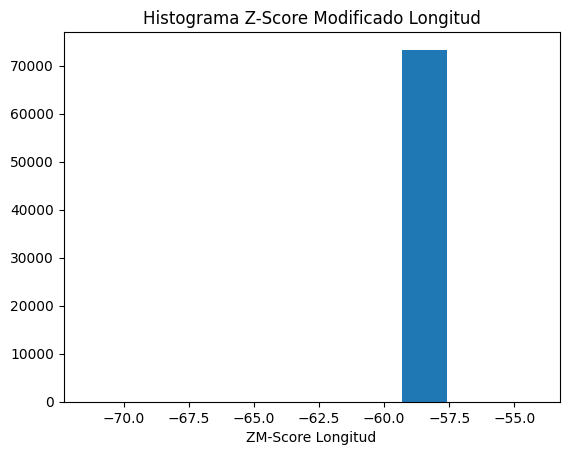

In [162]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

#### Multivariados

**Clustering - Mahalanobis**

In [163]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

In [164]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [165]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

**Analisis entre ambientes y habitaciones de valores atipicos**

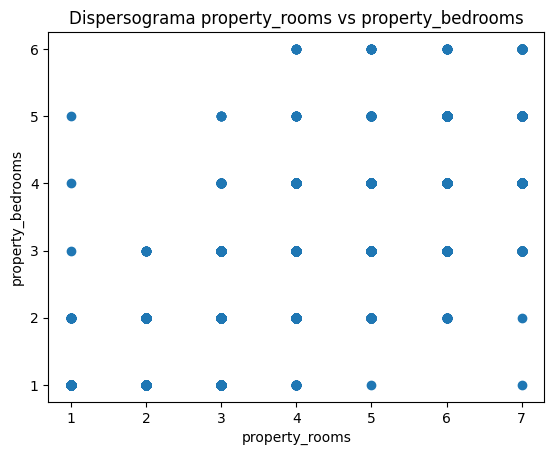

In [166]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

In [167]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
16673              3.0                2.0     0.045528
44019              2.0                1.0     1.176268
132166             4.0                3.0     1.536091
322814             3.0                2.0     0.045528
172798             3.0                2.0     0.045528

<AxesSubplot: ylabel='mahalanobis'>

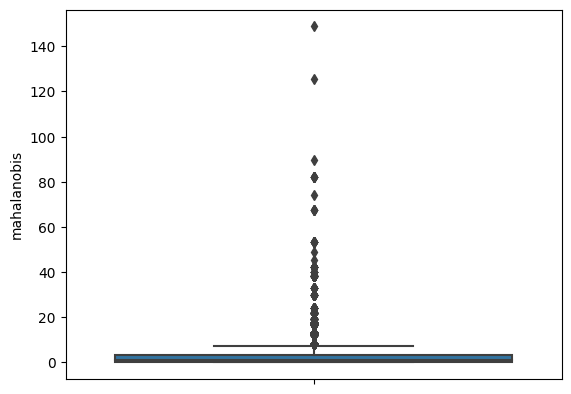

In [168]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

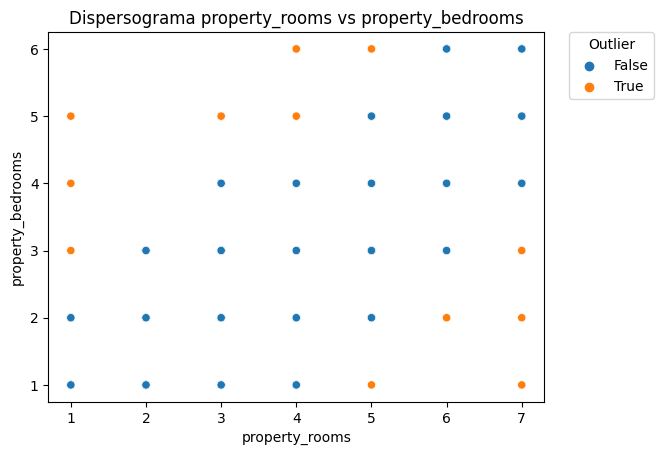

Los outliers para mahalanobis con un umbral de 35 son: 148. Constituyen el 0% de los datos


In [169]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

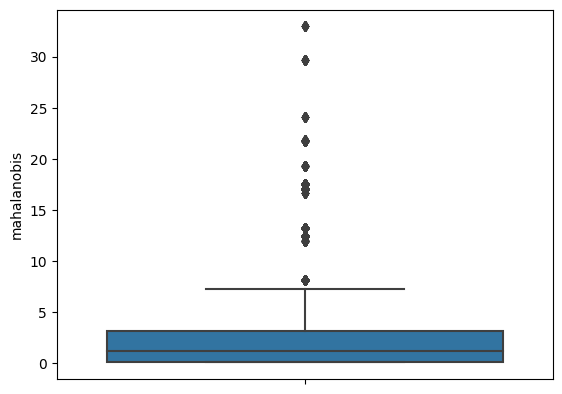

In [170]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [171]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
311614             7.0                3.0    38.255272
84147              4.0                5.0    40.083865
390139             7.0                3.0    38.255272
111180             7.0                3.0    38.255272
215531             7.0                3.0    38.255272
...                ...                ...          ...
33527              7.0                3.0    38.255272
454942             7.0                3.0    38.255272
73579              7.0                3.0    38.255272
385580             4.0                6.0    82.269795
403143             6.0                2.0    42.307093

[148 rows x 3 columns]

In [172]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 148 registros en train
Se han eliminado: 37 registros en test


Dispersograma sin los outliers mencionados


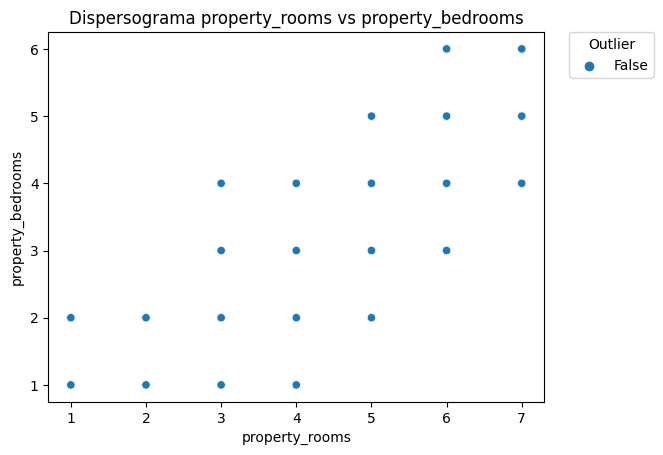

In [173]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

**Analisis entre superficie total y superificie cubierta de valores atipicos**

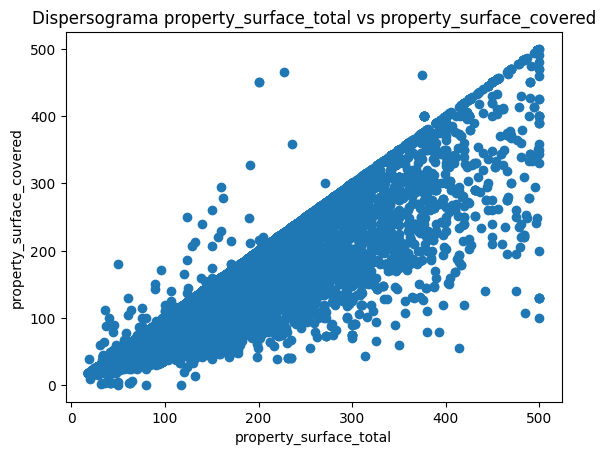

In [174]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [175]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
16673                     62.0                      58.0     0.146534
44019                     65.0                      65.0     0.254706
132166                   108.0                      59.0     3.767797
322814                    58.0                      54.0     0.183889
172798                    82.0                      82.0     0.340362

<AxesSubplot: ylabel='mahalanobis'>

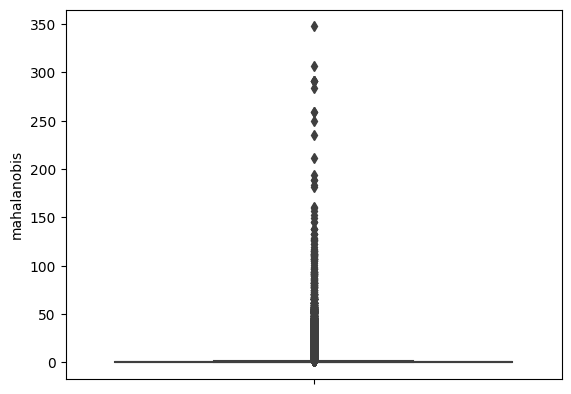

In [176]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [177]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [178]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
61175                    500.0                     200.0   181.460240
104592                   200.0                     450.0   258.919580
394706                   227.0                     466.0   250.077481
52066                    380.0                      80.0   193.877466
97055                    500.0                     130.0   291.162454
45540                    420.0                     120.0   188.613176
121279                   500.0                     130.0   291.162454
32735                    485.0                     108.0   306.265308
387598                   475.0                     140.0   235.212782
450430                   442.0                     140.0   189.038362
97083                    500.0                     130.0   291.162454
412681                   393.0                      80.0   211.744275
393711                   414.0                      56.0   284.090469
104359                   200.0                     450.0   258.919580
445383                   500.0                     130.0   291.162454
138208                   500.0                     100.0   347.774321
430838                   350.0                      60.0   183.620162

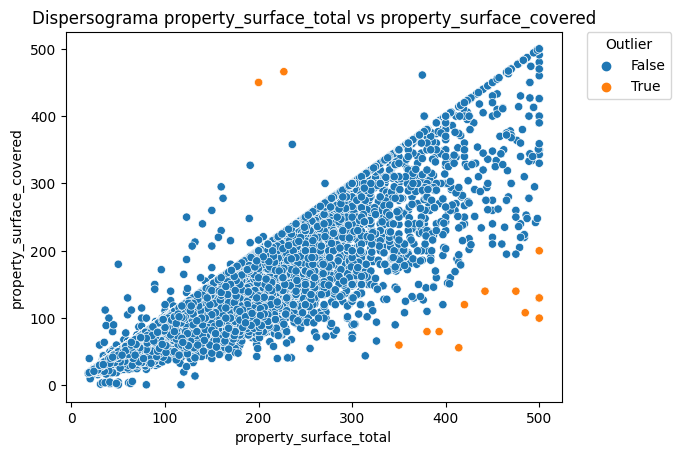

In [179]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

In [180]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 17 registros en train
Se han eliminado: 2 registros en test


Dispersograma sin los outliers mencionados


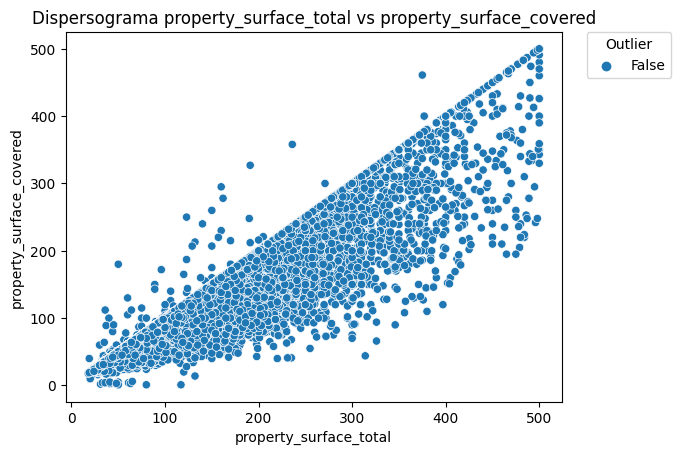

In [181]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

**Analisis entre latitud y logitud de valores atipicos**

In [182]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')

In [183]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 115.3205787159046


latitud   longitud  mahalanobis
102559 -31.977665 -64.559410   618.170414
102573 -32.966465 -60.636101   117.883594
131188 -41.083002 -71.182747  4625.474743
248772 -27.469213 -58.830635  1529.907527
102558 -32.966356 -60.671536   119.699550
...           ...        ...          ...
141150 -28.880556 -63.978659  1145.422180
405382 -26.616670 -54.133330  2587.414494
32705  -24.770804 -65.400812  2999.805607
190851 -31.360967 -64.343824   657.550134
106297 -41.086352 -71.185720  4628.604868

[87 rows x 3 columns]

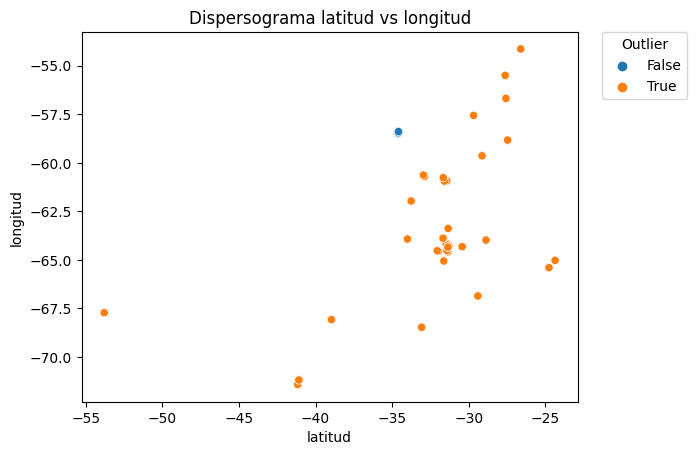

El grafico muestra 87 outliers
El mínimo según el umbral es de: 115.3205787159046


In [184]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


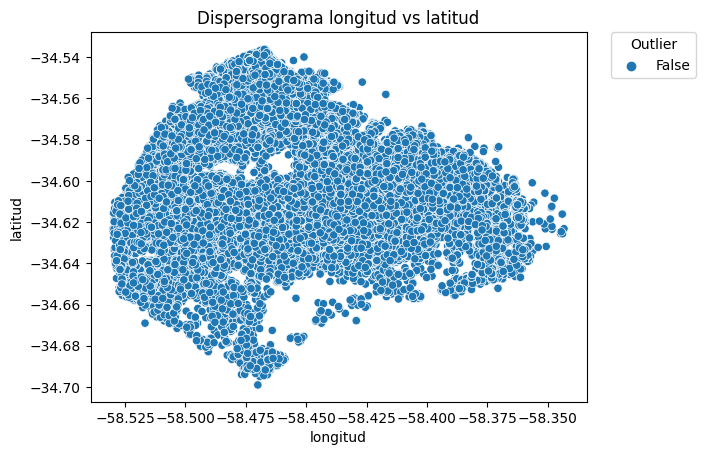

In [185]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

In [186]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 87 registros en train
Se han eliminado: 5139 registros en test


In [187]:
ds_train.place_l3.isna().sum()

45

In [188]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

**Analisis entre superficie total y precio**

In [189]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73084.000000
mean         1.949171
std         43.033817
min          0.000011
25%          0.178094
50%          0.394004
75%          0.680534
max      11279.522099
Name: mahalanobis, dtype: float64

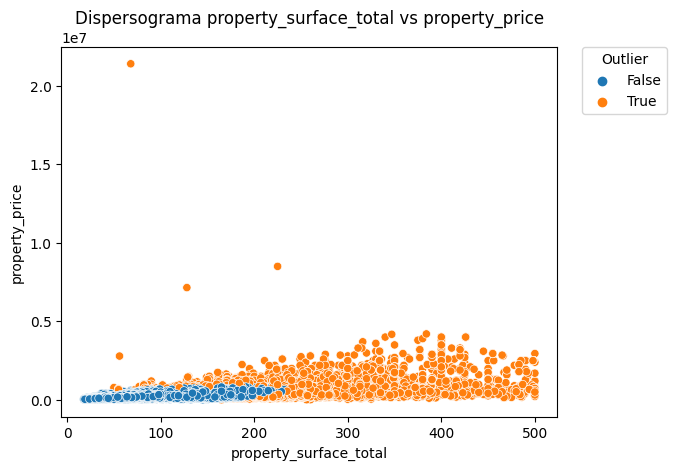

El grafico muestra 4649 outliers
El mínimo según el umbral es de: 5.000588447026087
Los outliers representan un 6.3611734442559245%


In [190]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

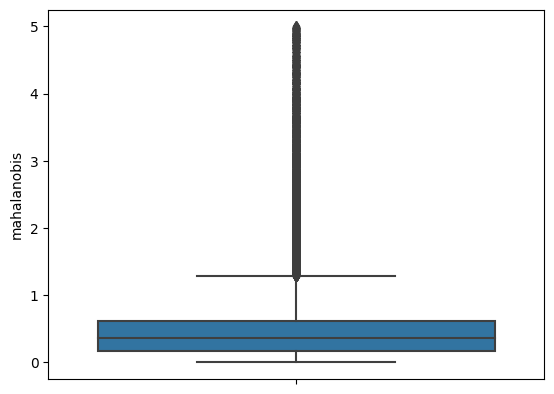

In [191]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

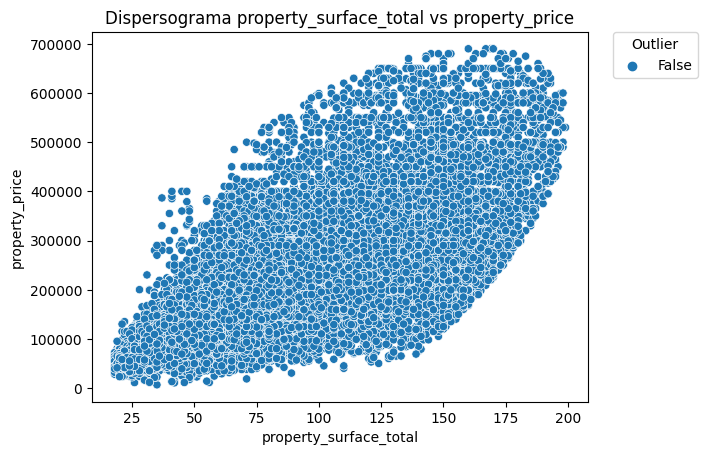

In [192]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

In [193]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73084
outliers encontrados para los price_m2: 3384
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4284.482758620689, limite inf: 325.86206896551744


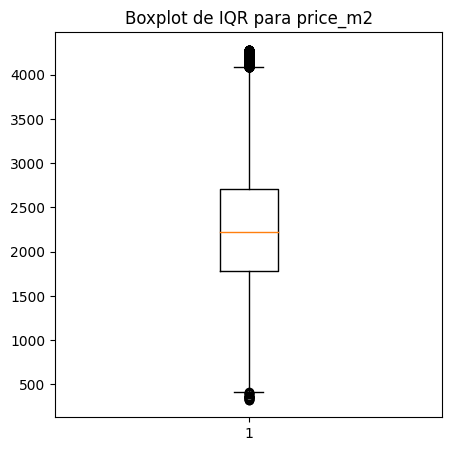

cantidad de datos del ds: 12514
outliers encontrados para los price_m2: 516
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4145.515328590786, limite inf: 498.2151930894304


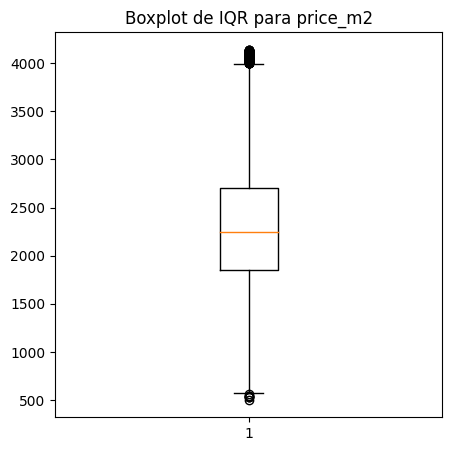

In [194]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3361 registros en train por encima del límite superior en train (4.5988177986973895)
Hay 23 registros en train por debajo del límite inferior en train  (0.03147063652783099)
Hay 452 registros en train por encima del límite superior en train (0.6184664221991133)%
Hay 4 registros en train por debajo del límite inferior en train  (0.005473154178753215%)


Text(0.5, 1.0, 'Distribución sin outliers')

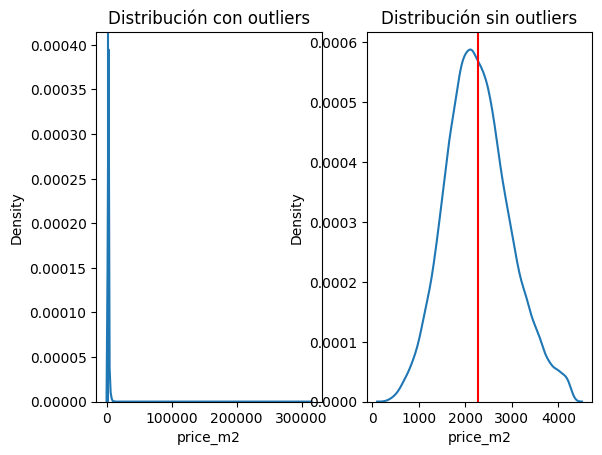

In [195]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

In [196]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3361 registros en train
Se han eliminado: 452 registros en test


In [197]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 23 registros en train
Se han eliminado: 4 registros en test


#### LOF

In [198]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [199]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [200]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

**Analisis de outliers para ambientes y habitaciones**

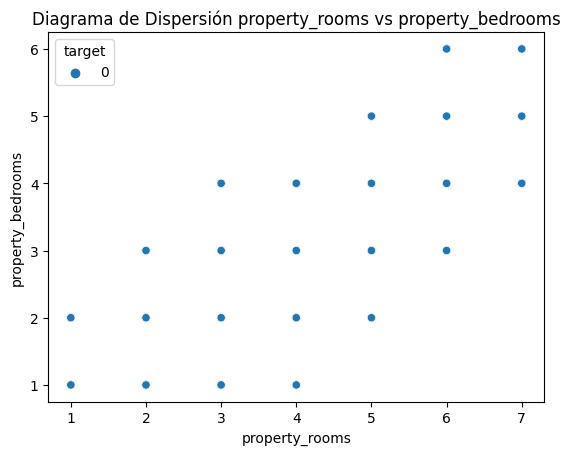

In [201]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [202]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date   end_date    latitud   longitud  \
16673   FSL3ErQeO/MvZI1wrpYK0A== 2021-06-10 2022-03-31 -34.626174 -58.454497   
44019   cI3QntP2et2Xc77KoSETcw== 2021-11-23 2022-01-27 -34.644770 -58.373330   
132166  CCbDzxaBSIZUA/NCFlRQAw== 2021-02-18 2021-02-20 -34.579603 -58.482543   
322814  mQjxkx543wRFWv9DCLznQA== 2021-06-15 2021-07-05 -34.593786 -58.432528   
172798  XtpCeP8+lE52HHM0KnhOoA== 2021-05-11 2021-08-09 -34.626703 -58.420027   
...                          ...        ...        ...        ...        ...   
432671  GrraGn/LK2b+8IXkzc7v/Q== 2021-05-04 2021-06-05 -34.634739 -58.479813   
315507  YjYz/7OPEA/2NDCiApqMow== 2021-01-04 2022-03-11 -34.625210 -58.444163   
45222   KcruS06RTVZiNqgzwIMYTA== 2021-01-26 2021-08-24 -34.599112 -58.402102   
392895  n4H64vwX6kZ3a4w6x+6A2Q== 2021-10-28 2021-11-03 -34.603637 -58.455017   
76763   PvqVWLmmX+qpNYuvNnyoTA== 2021-07-17 2022-04-22 -34.590778 -58.392539   

             place_l3 property_type  property_rooms  property_bedrooms  \
16673          Flores  Departamento             3.0                2.0   
44019        Barracas  Departamento             2.0                1.0   
132166  Villa Urquiza            PH             4.0                3.0   
322814        Palermo  Departamento             3.0                2.0   
172798          Boedo            PH             3.0                2.0   
...               ...           ...             ...                ...   
432671       Floresta            PH             5.0                4.0   
315507      Caballito  Departamento             3.0                2.0   
45222        Recoleta  Departamento             2.0                1.0   
392895   Villa Crespo  Departamento             1.0                1.0   
76763        Recoleta  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
16673                     62.0                      58.0         99000.0   
44019                     65.0                      65.0        165000.0   
132166                   108.0                      59.0        120000.0   
322814                    58.0                      54.0        190000.0   
172798                    82.0                      82.0        120000.0   
...                        ...                       ...             ...   
432671                   257.0                     190.0        270000.0   
315507                    98.0                      98.0        335000.0   
45222                     42.0                      40.0        120000.0   
392895                    44.0                      42.0         99500.0   
76763                     34.0                      31.0        109000.0   

                                           property_title  target  scores  
16673   Exc. depto. 3 amb c/ balcón -  cochera fija op...       0    -1.0  
44019                             Departamento - Barracas       0    -1.0  
132166                                 PH - Villa Urquiza       0    -1.0  
322814                             Departamento - Palermo       0    -1.0  
172798                 PH de 3 ambientes con patio. Boedo       0    -1.0  
...                                                   ...     ...     ...  
432671  PH · 5 AMBIENTES C/ PATIO Y COCHERA · CANDELAR...       0    -1.0  
315507                Venta-Pozo-Departamento - Caballito       0    -1.0  
45222                             Departamento - Recoleta       0    -1.0  
392895  VENTA  MONOAMBIENTE CON BALCON Y VISTA ABIERTA...       0    -1.0  
76763   VENTA MONOAMBIENTE AYACUCHO Y LAS HERAS - Reco...       0    -1.0  

[69700 rows x 15 columns]

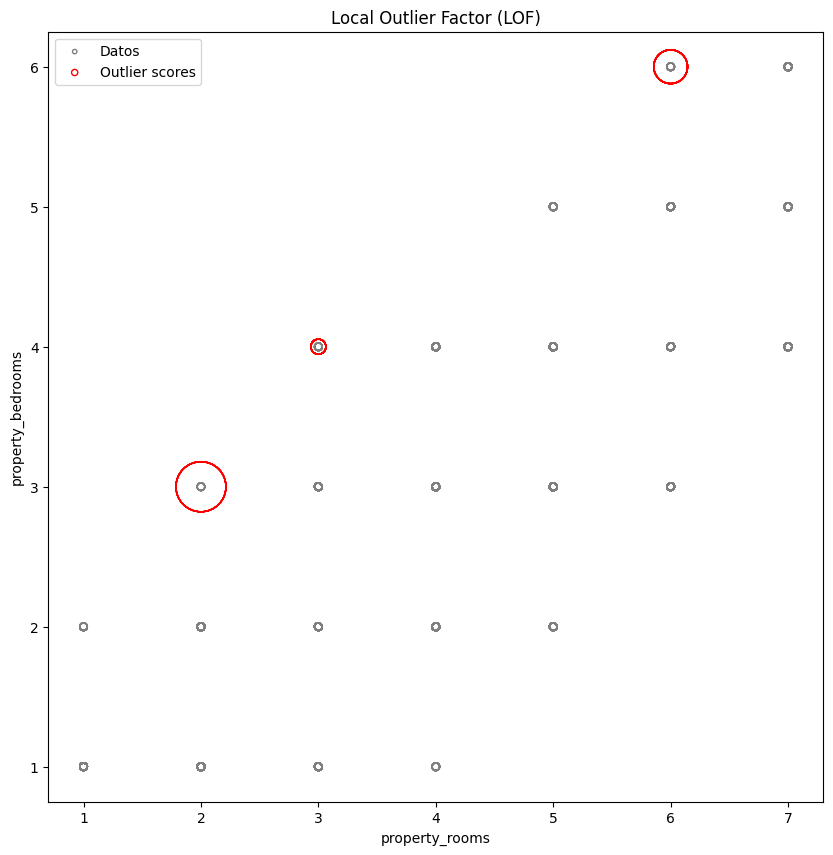

In [203]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

**Analisis de outliers para superficie total y superficie cubierta**

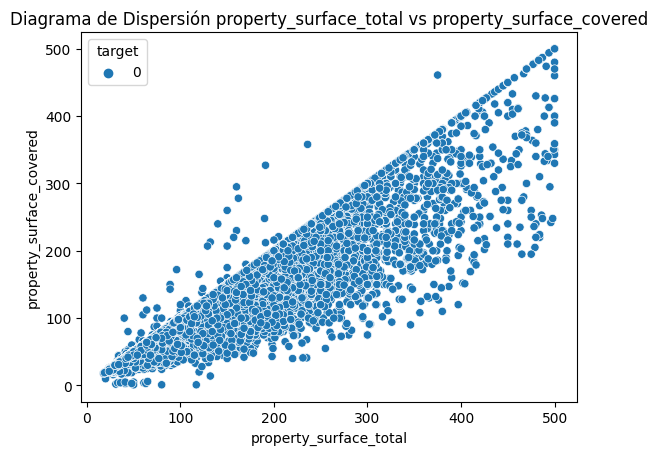

In [204]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [205]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date   end_date    latitud   longitud  \
16673   FSL3ErQeO/MvZI1wrpYK0A== 2021-06-10 2022-03-31 -34.626174 -58.454497   
44019   cI3QntP2et2Xc77KoSETcw== 2021-11-23 2022-01-27 -34.644770 -58.373330   
132166  CCbDzxaBSIZUA/NCFlRQAw== 2021-02-18 2021-02-20 -34.579603 -58.482543   
322814  mQjxkx543wRFWv9DCLznQA== 2021-06-15 2021-07-05 -34.593786 -58.432528   
172798  XtpCeP8+lE52HHM0KnhOoA== 2021-05-11 2021-08-09 -34.626703 -58.420027   
...                          ...        ...        ...        ...        ...   
432671  GrraGn/LK2b+8IXkzc7v/Q== 2021-05-04 2021-06-05 -34.634739 -58.479813   
315507  YjYz/7OPEA/2NDCiApqMow== 2021-01-04 2022-03-11 -34.625210 -58.444163   
45222   KcruS06RTVZiNqgzwIMYTA== 2021-01-26 2021-08-24 -34.599112 -58.402102   
392895  n4H64vwX6kZ3a4w6x+6A2Q== 2021-10-28 2021-11-03 -34.603637 -58.455017   
76763   PvqVWLmmX+qpNYuvNnyoTA== 2021-07-17 2022-04-22 -34.590778 -58.392539   

             place_l3 property_type  property_rooms  property_bedrooms  \
16673          Flores  Departamento             3.0                2.0   
44019        Barracas  Departamento             2.0                1.0   
132166  Villa Urquiza            PH             4.0                3.0   
322814        Palermo  Departamento             3.0                2.0   
172798          Boedo            PH             3.0                2.0   
...               ...           ...             ...                ...   
432671       Floresta            PH             5.0                4.0   
315507      Caballito  Departamento             3.0                2.0   
45222        Recoleta  Departamento             2.0                1.0   
392895   Villa Crespo  Departamento             1.0                1.0   
76763        Recoleta  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
16673                     62.0                      58.0         99000.0   
44019                     65.0                      65.0        165000.0   
132166                   108.0                      59.0        120000.0   
322814                    58.0                      54.0        190000.0   
172798                    82.0                      82.0        120000.0   
...                        ...                       ...             ...   
432671                   257.0                     190.0        270000.0   
315507                    98.0                      98.0        335000.0   
45222                     42.0                      40.0        120000.0   
392895                    44.0                      42.0         99500.0   
76763                     34.0                      31.0        109000.0   

                                           property_title  target    scores  
16673   Exc. depto. 3 amb c/ balcón -  cochera fija op...       0 -1.000000  
44019                             Departamento - Barracas       0 -1.000000  
132166                                 PH - Villa Urquiza       0 -1.028237  
322814                             Departamento - Palermo       0 -1.000000  
172798                 PH de 3 ambientes con patio. Boedo       0 -1.000000  
...                                                   ...     ...       ...  
432671  PH · 5 AMBIENTES C/ PATIO Y COCHERA · CANDELAR...       0 -1.058879  
315507                Venta-Pozo-Departamento - Caballito       0 -1.000000  
45222                             Departamento - Recoleta       0 -1.000000  
392895  VENTA  MONOAMBIENTE CON BALCON Y VISTA ABIERTA...       0 -1.000000  
76763   VENTA MONOAMBIENTE AYACUCHO Y LAS HERAS - Reco...       0 -1.000000  

[69700 rows x 15 columns]

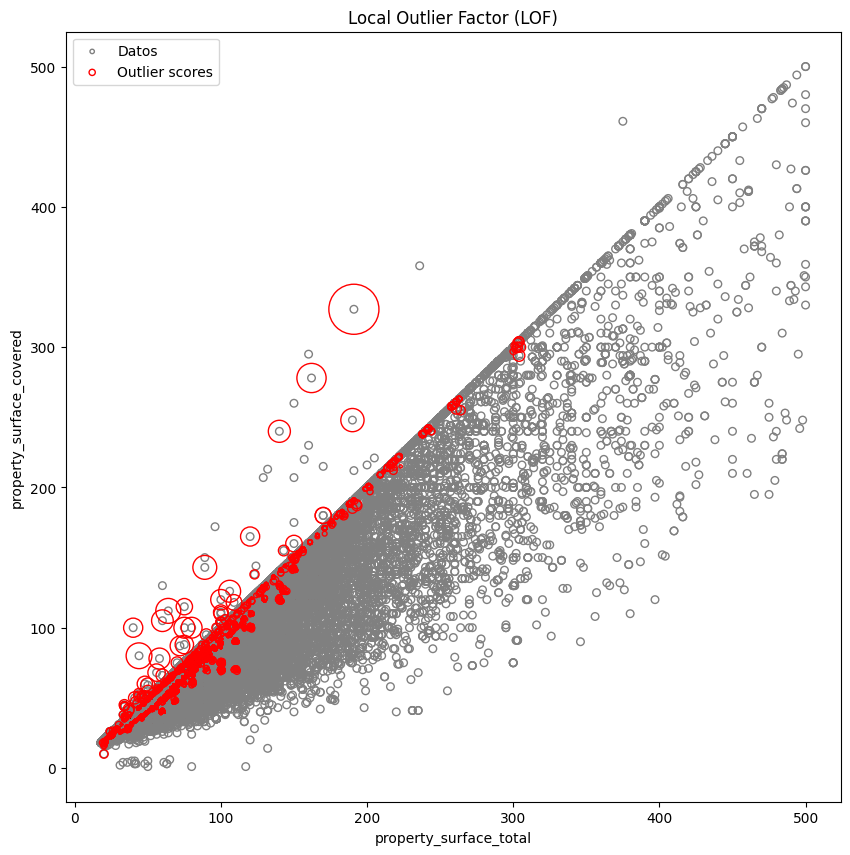

In [206]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

### Reduccion de la Dimensionalidad

#### Analisis PCA

In [207]:
# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

In [208]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
16673  -34.626174 -58.454497             3.0                2.0   
44019  -34.644770 -58.373330             2.0                1.0   
132166 -34.579603 -58.482543             4.0                3.0   
322814 -34.593786 -58.432528             3.0                2.0   
172798 -34.626703 -58.420027             3.0                2.0   
...           ...        ...             ...                ...   
432671 -34.634739 -58.479813             5.0                4.0   
315507 -34.625210 -58.444163             3.0                2.0   
45222  -34.599112 -58.402102             2.0                1.0   
392895 -34.603637 -58.455017             1.0                1.0   
76763  -34.590778 -58.392539             1.0                1.0   

        property_surface_total  property_surface_covered  
16673                     62.0                      58.0  
44019                     65.0                      65.0  
132166                   108.0                      59.0  
322814                    58.0                      54.0  
172798                    82.0                      82.0  
...                        ...                       ...  
432671                   257.0                     190.0  
315507                    98.0                      98.0  
45222                     42.0                      40.0  
392895                    44.0                      42.0  
76763                     34.0                      31.0  

[69700 rows x 6 columns]

In [209]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -1.130036 -0.387363        0.225492           0.173270   
1     -1.834895  1.786816       -0.585990          -0.889654   
2      0.635197 -1.138615        1.036974           1.236195   
3      0.097596  0.201112        0.225492           0.173270   
4     -1.150083  0.535966        0.225492           0.173270   
...         ...       ...             ...                ...   
69695 -1.454676 -1.065495        1.848456           2.299120   
69696 -1.093489 -0.110561        0.225492           0.173270   
69697 -0.104288  1.016135       -0.585990          -0.889654   
69698 -0.275804 -0.401281       -1.397472          -0.889654   
69699  0.211616  1.272296       -1.397472          -0.889654   

       property_surface_total  property_surface_covered  
0                   -0.331978                 -0.261057  
1                   -0.283047                 -0.122667  
2                    0.418293                 -0.241287  
3                   -0.397219                 -0.340137  
4                   -0.005773                  0.213422  
...                       ...                       ...  
69695                2.848518                  2.348578  
69696                0.255191                  0.529741  
69697               -0.658182                 -0.616916  
69698               -0.625562                 -0.577377  
69699               -0.788664                 -0.794846  

[69700 rows x 6 columns]

**Replicamos para test las mismas transformaciones**

In [210]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
426042 -34.586437 -58.429976             1.0                1.0   
314728 -34.603697 -58.442640             3.0                2.0   
167893 -34.604499 -58.461743             1.0                1.0   
415550 -34.615206 -58.437531             3.0                2.0   
2538   -34.565653 -58.453158             4.0                3.0   
...           ...        ...             ...                ...   
178836 -34.569218 -58.453512             2.0                1.0   
115363 -34.584581 -58.405142             3.0                2.0   
46947  -34.593170 -58.400076             4.0                3.0   
343391 -34.615260 -58.411700             2.0                1.0   
318771 -34.632044 -58.358613             3.0                2.0   

        property_surface_total  property_surface_covered  
426042                    45.0                      41.0  
314728                    63.0                      58.0  
167893                    37.0                      36.0  
415550                    99.0                      99.0  
2538                     100.0                     100.0  
...                        ...                       ...  
178836                    34.0                      34.0  
115363                    60.0                      54.0  
46947                     80.0                      76.0  
343391                    44.0                      40.0  
318771                    44.0                      44.0  

[12058 rows x 6 columns]

In [211]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test),
                                            columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0      0.278216  0.078812       -1.358596          -0.849740   
1     -0.524419 -0.307953        0.301512           0.240046   
2     -0.561713 -0.891384       -1.358596          -0.849740   
3     -1.059617 -0.151918        0.301512           0.240046   
4      1.244699 -0.629177        1.131566           1.329832   
...         ...       ...             ...                ...   
12053  1.078920 -0.639995       -0.528542          -0.849740   
12054  0.364514  0.837290        0.301512           0.240046   
12055 -0.034871  0.991991        1.131566           1.329832   
12056 -1.062118  0.636994       -0.528542          -0.849740   
12057 -1.842627  2.258334        0.301512           0.240046   

       property_surface_total  property_surface_covered  
0                   -0.575946                 -0.567049  
1                   -0.253387                 -0.196788  
2                   -0.719306                 -0.675950  
3                    0.391732                  0.696195  
4                    0.409652                  0.717975  
...                       ...                       ...  
12053               -0.773065                 -0.719510  
12054               -0.307146                 -0.283909  
12055                0.051253                  0.195253  
12056               -0.593866                 -0.588830  
12057               -0.593866                 -0.501709  

[12058 rows x 6 columns]

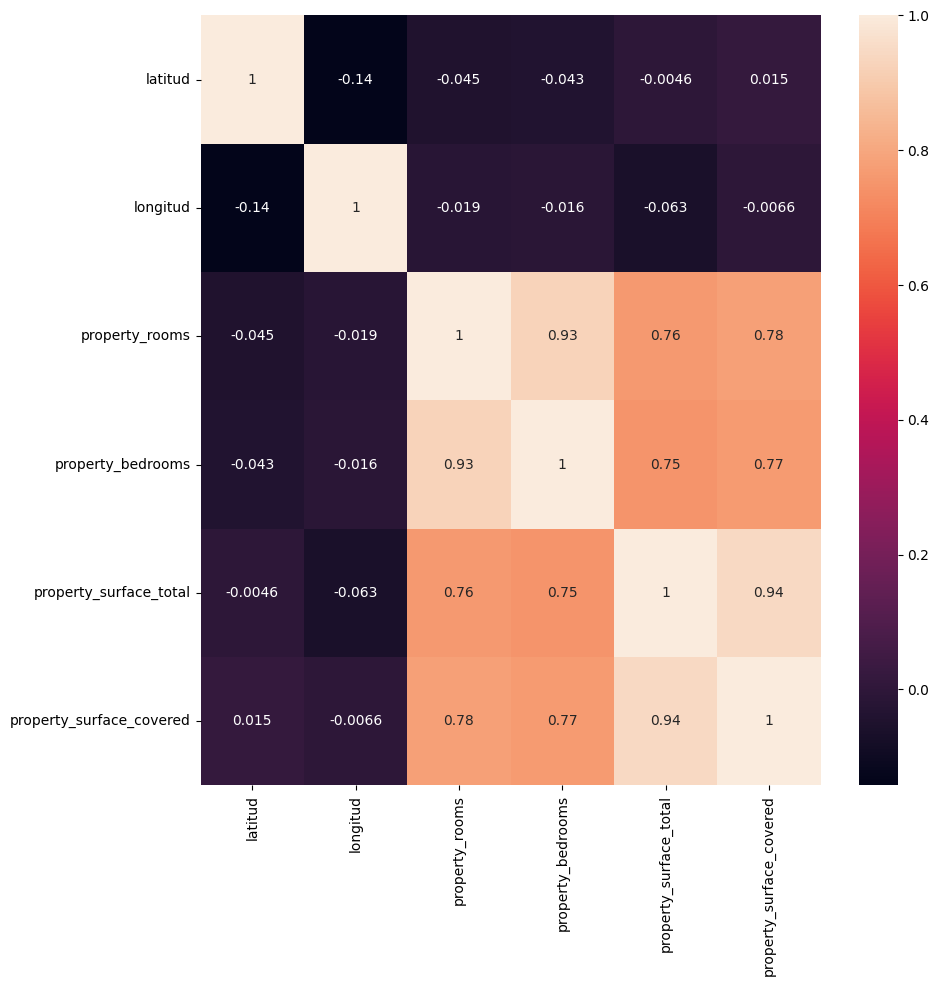

In [212]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

In [213]:
ds_reducido_normalizado.shape

(69700, 6)

In [214]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0     -0.073801  0.559725  1.090960 -0.411848 -0.047698 -0.073716
1     -0.948422  2.519179  0.012125  0.702345 -0.200068 -0.101745
2      1.234230 -1.186534  0.403880 -1.094982  0.118561  0.478806
3     -0.175842  0.108334 -0.181738 -0.570635 -0.054589 -0.005108
4      0.309093  1.201260  0.416385 -0.005570 -0.037538 -0.151729
...         ...       ...       ...       ...       ...       ...
69695  4.712464  0.261883  1.653165  0.613119  0.355973  0.269250
69696  0.610942  0.690260  0.812625  0.266383 -0.028071 -0.229658
69697 -1.393326  0.776211 -0.619736  0.130345 -0.217069  0.004830
69698 -1.731877 -0.127993  0.492264  0.549336  0.370716 -0.094313
69699 -1.964066  0.714092 -1.021057  0.346097  0.361051  0.039011

[69700 rows x 6 columns]

In [215]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [216]:
varianza_explicada.cumsum()

array([0.57741326, 0.76836041, 0.91150779, 0.97897876, 0.99096487,
       1.        ])

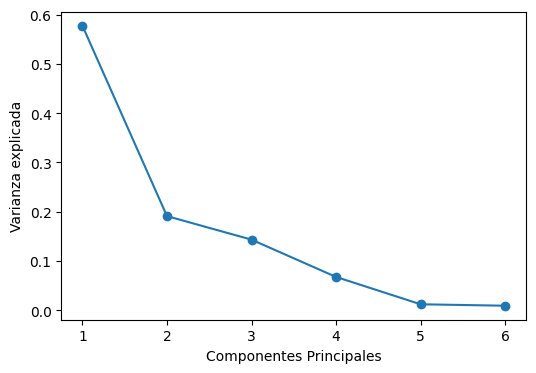

In [217]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

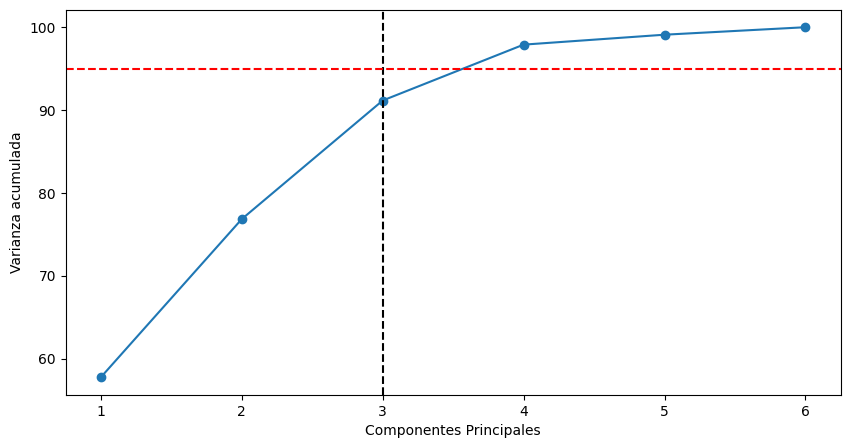

In [218]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

In [219]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0 -0.073801  0.559725  1.090960
1 -0.948422  2.519179  0.012125
2  1.234230 -1.186534  0.403880
3 -0.175842  0.108334 -0.181738
4  0.309093  1.201260  0.416385